In [1]:
import astropy
import numpy as np
import pandas as pd
import matplotlib
import scipy

from astropy.io import fits
from astropy.wcs import WCS
from astropy import wcs
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from reproject import reproject_exact
from reproject.mosaicking import reproject_and_coadd

In [2]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.color'] = 'Black'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = (9, 6)

# ABSORPTION LINE DATA

In [3]:
FUSE1 = pd.read_csv('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Wakker 2006.csv')

In [4]:
FUSE1

Name    GLON   GLAT  Flux   V(HI) 1  V(HI)2 V(HI)3 V(M)1 V(M)2  \
0    1H 0707-495  260.17 -17.67   1.76       -1      61            2    61   
1    1H 0717+714  143.98  28.02   2.70      -51      -5          -51    -5   
2       3C 249.1  130.39  38.55   1.10      -50       9          -47    -2   
3       3C 273.0  289.95  64.36  26.86       -6      25          -14    22   
4    ESO 141-G55  338.18 -26.71   5.17      -45      -1           -1         
..           ...     ...    ...    ...      ...     ...    ...   ...   ...   
68  PKS 2005-489  350.37 -32.60   4.96        0       2            2    67   
69  PKS 2155-304   17.73 -52.25  12.75       -4       0           -4         
70      Ton S180  139.00 -85.07   6.35       -6       0           -6         
71      Ton S210  224.97 -83.16   6.23      -10       0          -10         
72    VII Zw 118  151.36  25.99   2.01       -3       0           -1         

   V(M)3 V(H2)1 V(H2)2 V(H2)3  RA (icrs)  DEC (icrs)  
0            -1                 107.1768    -49.5517  
1           -51     -5          110.4802     71.3444  
2             3                 166.0693     76.9841  
3            -9     28          187.2775      2.0525  
4            -4                 290.3057    -58.6731  
..   ...    ...    ...    ...        ...         ...  
68            2                 302.3543    -48.8341  
69           -7                 329.7217    -30.2263  
70                               14.3335    -22.3833  
71          -10                  20.4650    -28.3493  
72           -3                 106.8111     64.6002  

[73 rows x 15 columns]

In [5]:
FUSE2 = pd.read_csv('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Wakker2.csv')

In [6]:
FUSE2

Name  F  V(H2)  logN(J=0)  logN(J=1)  logN(H2)  FWHM
0     1H 0707-495        -1      14.73      15.29     15.56   9.9
1     1H 0707-495        61      14.35      14.48     14.59   9.0
2     1H 0717+714       -51      14.12      14.71     14.96   9.0
3     1H 0717+714        -5      16.28      16.87     17.04  10.5
4        3C 249.1       -50      15.13      15.72     15.01   9.0
..            ... ..    ...        ...        ...       ...   ...
128  PKS 2005-489         2      14.46      14.97     15.22  10.6
129  PKS 2155-304        -7      13.58      14.14     14.42   9.0
130      Ton S180        -6      14.15      14.35     14.47   9.0
131      Ton S210       -10      15.04      15.41     15.61   8.1
132    VII Zw 118        -3      18.60      18.91     19.09   8.1

[133 rows x 7 columns]

# PLOTTING TAR.GZ FILES

In [9]:
file11[0].header

SIMPLE  =                    T / Written by IDL:  Mon Jan 14 10:31:29 2013      
BITPIX  =                  -64 / IEEE double precision floating point           
NAXIS   =                    2 /                                                
NAXIS1  =                   80 /Number of positions along axis 1                
NAXIS2  =                   80 /Number of positions along axis 2                
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   1.449400000000E-01                                                  
BMIN    =   1.449400000000E-01                                                  
BPA     =   0.000000000000E+00                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = '1H0717  '                                                            
                            

In [10]:
file11[0].header['CUNIT3'] = 'm/s     '
file13[0].header['CUNIT3'] = 'm/s     '

In [11]:
file11[0].header

SIMPLE  =                    T / Written by IDL:  Mon Jan 14 10:31:29 2013      
BITPIX  =                  -64 / IEEE double precision floating point           
NAXIS   =                    2 /                                                
NAXIS1  =                   80 /Number of positions along axis 1                
NAXIS2  =                   80 /Number of positions along axis 2                
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   1.449400000000E-01                                                  
BMIN    =   1.449400000000E-01                                                  
BPA     =   0.000000000000E+00                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = '1H0717  '                                                            
                            

In [12]:
def pix(file):
    lat, lon = np.zeros(len(FUSE1['GLAT'])), np.zeros(len(FUSE1['GLON']))
    for i in range(len(FUSE1['GLAT'])):
        pix_x = file[0].header['CRPIX1'] + ((FUSE1['GLAT'][i] - file[0].header['CRVAL1'])/ file[0].header['CDELT1'])
        pix_y = file[0].header['CRPIX2'] + ((FUSE1['GLON'][i] - file[0].header['CRVAL2'])/ file[0].header['CDELT2'])
        lat[i] = pix_y
        lon[i] = pix_x
    return lat, lon

In [13]:
def plot_file(file1, file2, file3, title, vmin1 = 0, vmin2 = 0, vmin3 = 0, vmax1 = 0, vmax2 = 0, vmax3 = 0, y = 0.9, mos = False):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10), constrained_layout = True)
    fig.suptitle(title, y = y, fontsize = 40)
    #wcs1 = WCS(file1[0].header)
    #wcs2 = WCS(file2[0].header)
    #wcs3 = WCS(file3[0].header)

    #ax1.plot(projection = wcs2)
    if vmax1 == 0:
        IR = ax1.imshow(file2[0].data, cmap = 'magma', vmin = vmin1)
    else:
        IR = ax1.imshow(file2[0].data, cmap = 'magma', vmin = vmin1, vmax = vmax1)
    ax1.set_title('IR (Local)', fontsize = 25)
    cbar1 = fig.colorbar(IR, ax = ax1, orientation = 'horizontal', pad = 0.1)
    
    #ax2.plot(projection = wcs1)
    if mos == False: 
        lat2, lon2 = pix(file1)
        ax2.scatter(lat2, lon2, s = 90)
    #print(lat2, lon2)
    if (vmax2 == 0) and (mos == False):
        inter = ax2.imshow(file1[0].data, cmap = 'magma', vmin = vmin2)
    elif mos == True:
        inter = ax2.imshow(file1, cmap = 'magma', vmin = vmin2, vmax = vmax2)
    else:
        inter = ax2.imshow(file1[0].data, cmap = 'magma', vmin = vmin2, vmax = vmax2)
    ax2.set_title('Intermediate HI Column Densities', fontsize = 25)
    cbar2 = fig.colorbar(inter, ax = ax2, orientation = 'horizontal', pad = 0.1)
    
    #ax3.plot(projection = wcs3)
    if mos == False: 
        lat3, lon3 = pix(file3)
        ax3.scatter(lat3, lon3, s = 90)
    if (vmax3 == 0) and (mos == False):
        local = ax3.imshow(file3[0].data, cmap = 'magma', vmin = vmin3)
    elif mos == True:
        local = ax3.imshow(file3, cmap = 'magma', vmin = vmin3, vmax = vmax3)
    else:
        local = ax3.imshow(file3[0].data, cmap = 'magma', vmin = vmin3, vmax = vmax3)
    ax3.set_title('Local HI Column Densities', fontsize = 25)
    cbar3 = fig.colorbar(local, ax = ax3, orientation = 'horizontal', pad = 0.1)

In [138]:
def local_IR(file3, file2, x, y, slope, vmax = 0, vmin = 0, rav = True, save = True, title = '', inter = False):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10), constrained_layout = True)
    
    ax1.set_title('Estimating Expected IR', fontsize = 25)
    if rav == True:
        ax1.scatter(file3[0].data.ravel(), file2[0].data.ravel())
    else: # URSA
        ax1.scatter(file3.ravel(), file2.ravel())
        
    if inter == False:
        ax1.set_xlabel('Local Gas', fontsize = 25)
    else:
        ax1.set_xlabel('Intermediate Gas', fontsize = 25)
    ax1.set_ylabel('IR', fontsize = 25)
    ax1.axline((x,y), slope = slope, c = 'C1')
    
    ax2.set_title('Expected IR', fontsize = 25)
    if rav == True:
        IR_exp = y + (slope * (file3[0].data - x))
    else:
        IR_exp = y + (slope * (file3 - x))
        
    c2 = ax2.imshow(IR_exp)
    fig.colorbar(c2, ax = ax2, orientation = 'horizontal', pad = 0.1)
    
    ax3.set_title('Excess IR', fontsize = 25)
    if rav == True:
        IR_exc = file2[0].data - IR_exp
    else:
        IR_exc = file2 - IR_exp
        
    IR_exc = np.asarray(IR_exc)
    exc = np.where(IR_exc > ((3 * np.std(IR_exc[np.isnan(IR_exc) == False])) + np.mean(IR_exc[np.isnan(IR_exc) == False]))) # identifying excess values (values that're 3 sigma above the mean)
    IR_exc[exc] = 0 # removing excess values
        
    if vmax == 0:
        vmax = np.nanmax(np.abs(IR_exc))
        c3 = ax3.imshow(IR_exc, vmax = vmax, vmin = -vmax, cmap = 'RdYlBu')
    else:
        c3 = ax3.imshow(IR_exc, vmax = vmax, vmin = vmin, cmap = 'RdYlBu')
    fig.colorbar(c3, ax = ax3, orientation = 'horizontal', pad = 0.1)
    
    if save == True:
        np.save('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/IR_EXCESS/' + title + '.fits', IR_exc)
    
    return IR_exc

In [96]:
# where molecular gas would be

def IR_overlay(file3, IR_exc, URSA = False):
    if URSA:
        plt.figure(figsize = (10, 18))
        plt.imshow(file3, cmap = 'gray_r')
    else:
        plt.figure(figsize = (7,16))
        plt.imshow(file3[0].data, cmap = 'gray_r')
    
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.contour(IR_exc, colors = 'orange', levels = [0, 2, 3], linestyles = ['dotted', '-', '-'], linewidths = 3) 
    plt.contourf(IR_exc, colors = 'orange', levels = [0, 10], alpha = 0.1)
    plt.title('IR Excess Contours Atop Local HI')
    
    print(IR_exc.shape)

In [8]:
file11 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/1H0717/_inter_HI.fits')
file12 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/1H0717/_IR.fits')
file13 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/1H0717/_local_HI.fits')

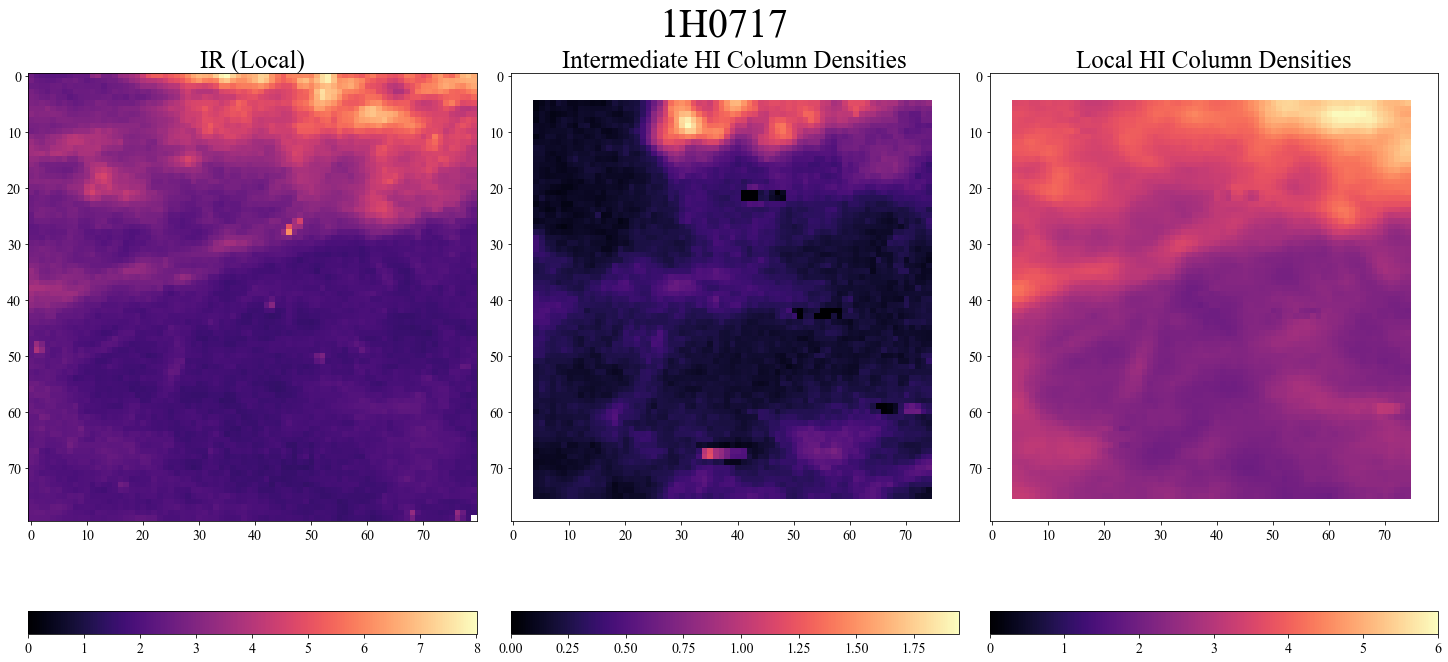

In [474]:
plot_file(file11, file12, file13, '1H0717')

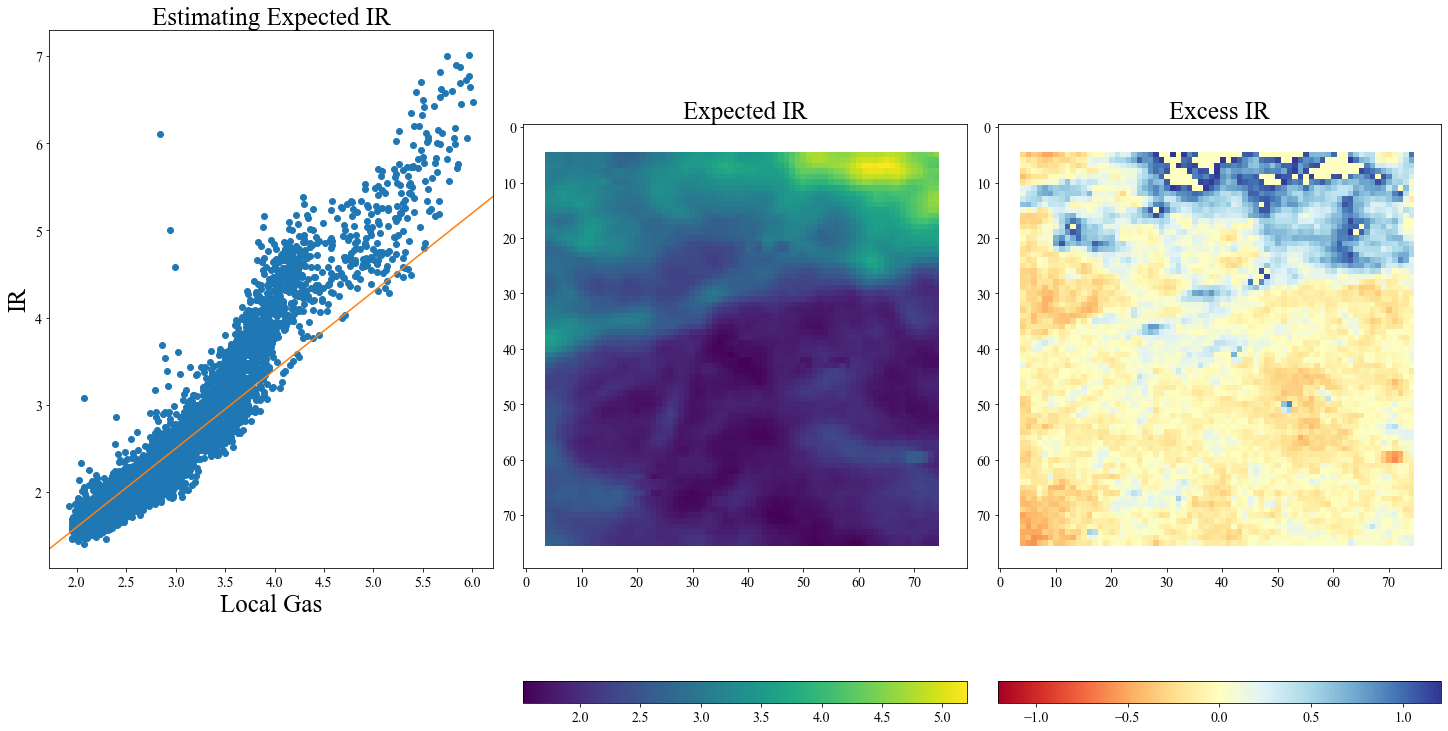

In [101]:
IR_exc1 = local_IR(file13, file12, 2, 1.6, 0.9, title = '1H0717')

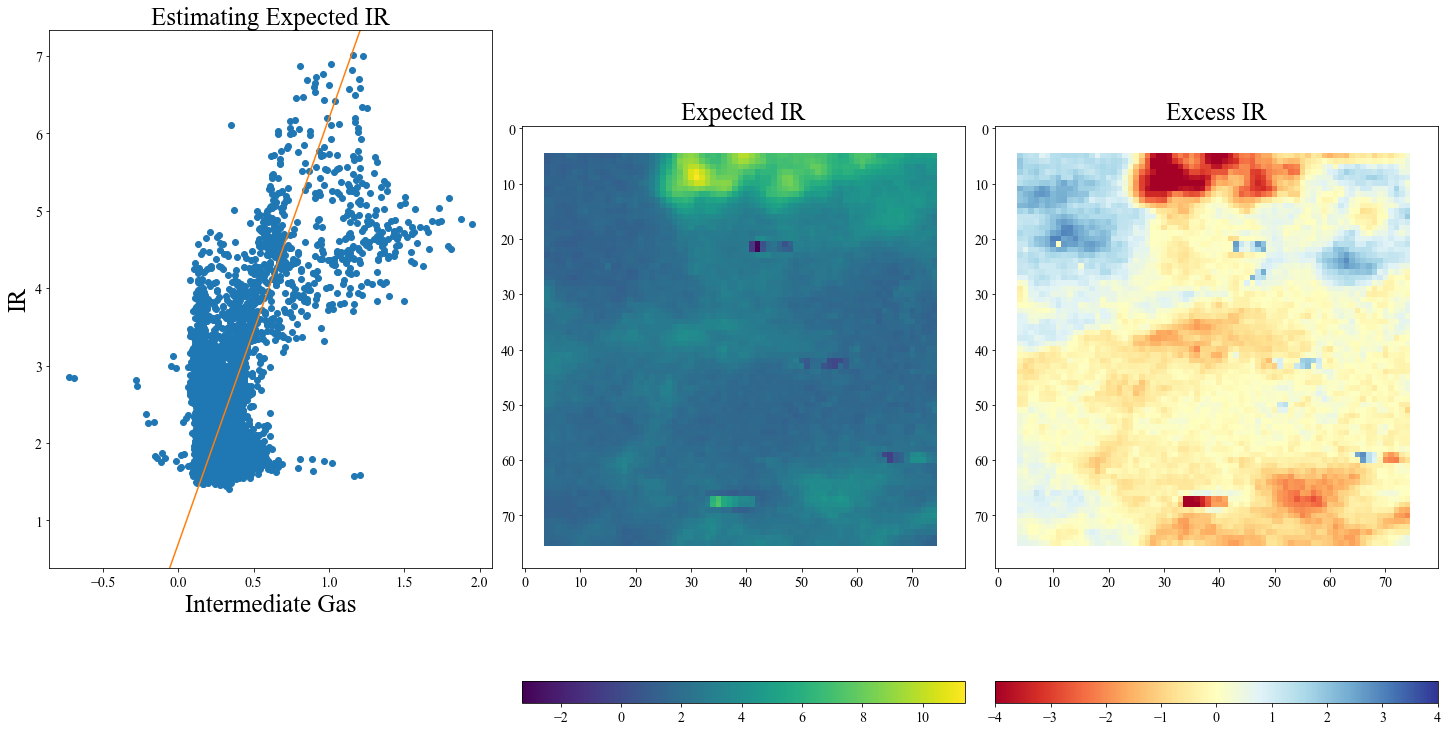

In [159]:
IR_exc11 = local_IR(file11, file12, 0, 0.7, 5.5, vmin = -4, vmax = 4, title = '1H0717', inter = True)

(80, 80)


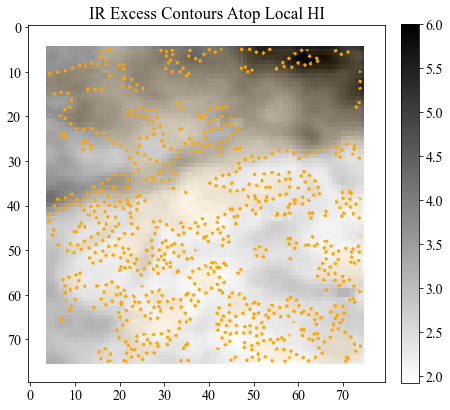

In [98]:
IR_overlay(file13, IR_exc1)

In [46]:
file21 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/LOOP4/_inter_HI.fits')
file22 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/LOOP4/_IR.fits')
file23 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/LOOP4/_local_HI.fits')

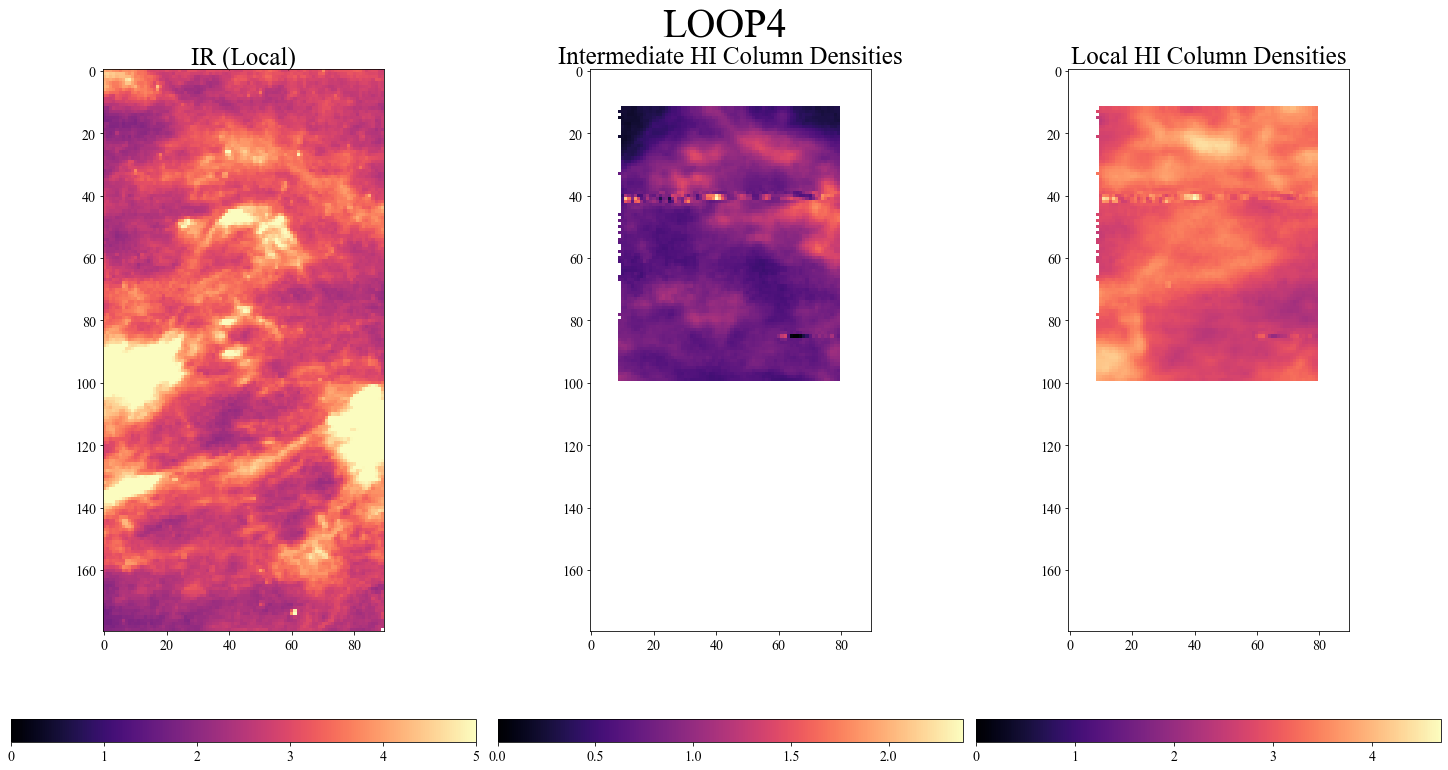

In [47]:
plot_file(file21, file22, file23, 'LOOP4', vmax1 = 5, y = 1.05)

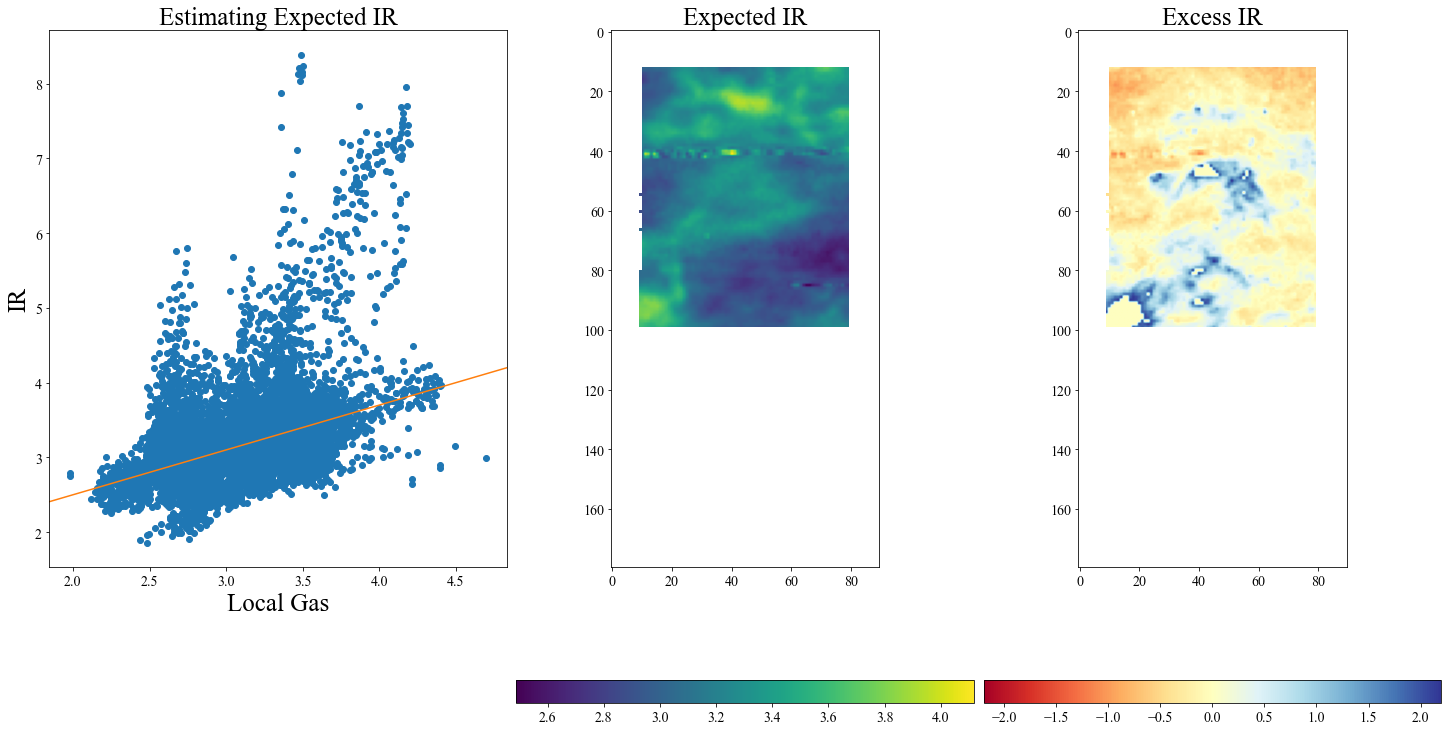

In [99]:
IR_exc2 = local_IR(file23, file22, 2, 2.5, 0.6, title = 'LOOP4')

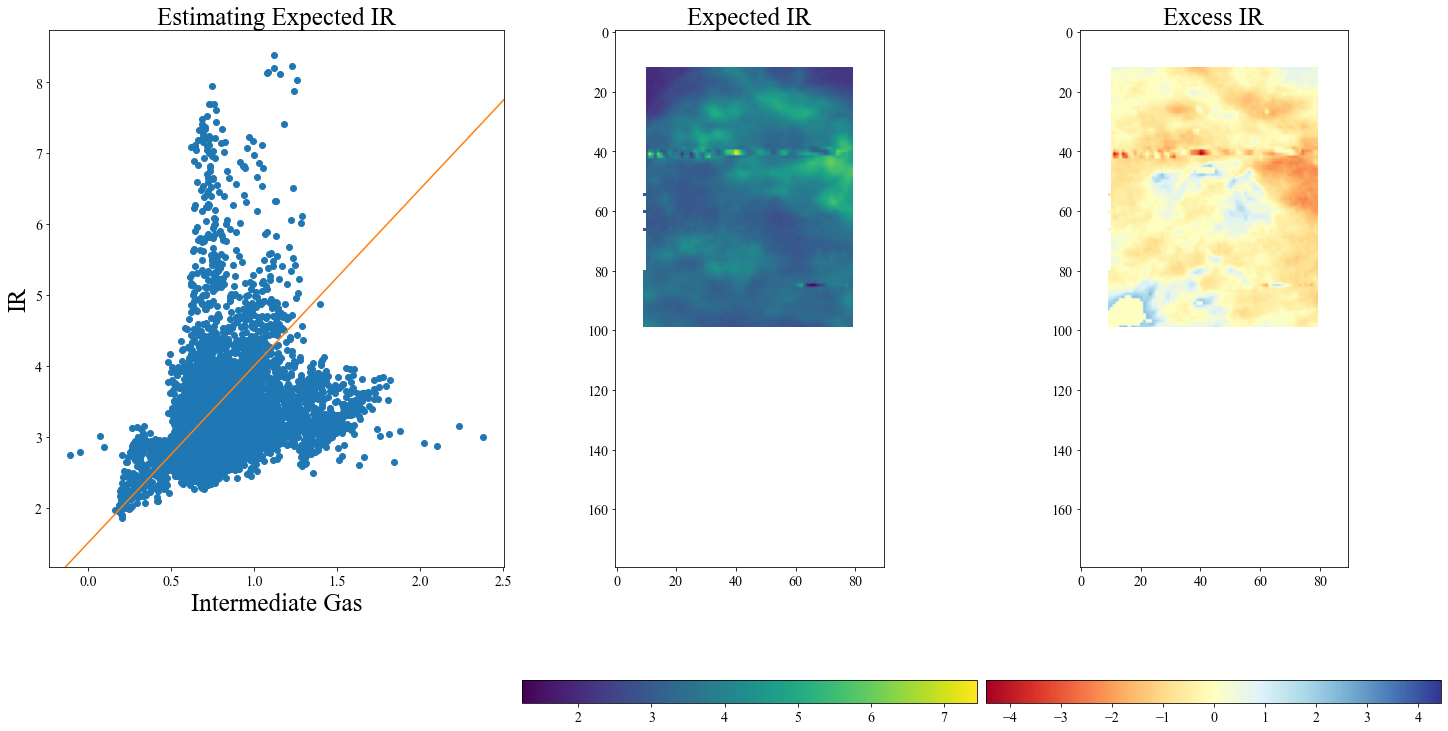

In [163]:
IR_exc22 = local_IR(file21, file22, 0, 1.5, 2.5, title = 'LOOP4', inter = True)

(180, 90)


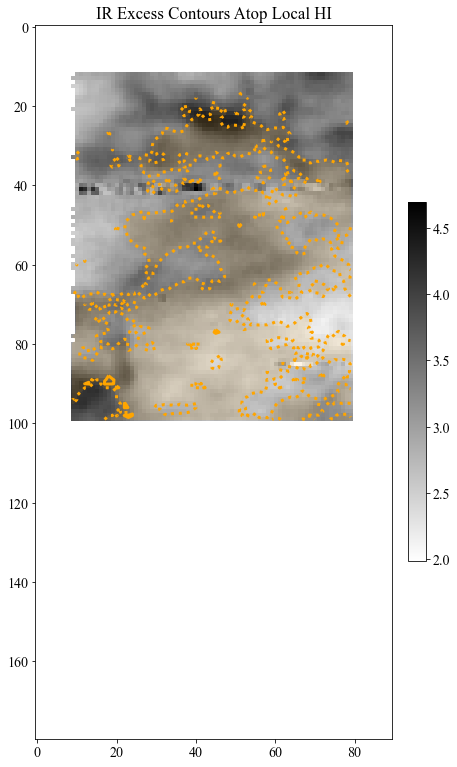

In [49]:
IR_overlay(file23, IR_exc2)

In [50]:
file31 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MKR290/_inter_HI.fits')
file32 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MKR290/_IR.fits')
file33 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MKR290/_local_HI.fits')

NO EXCESS IR (backed by Pierre's work)

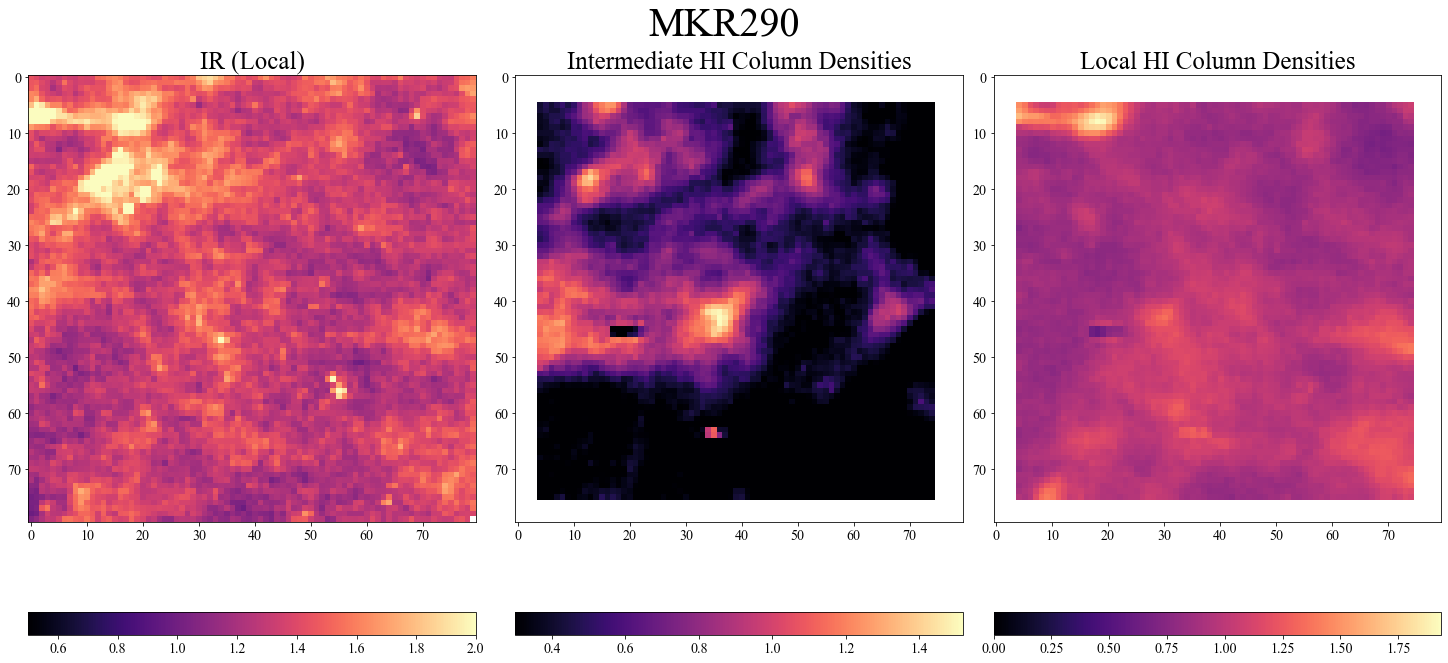

In [51]:
plot_file(file31, file32, file33, 'MKR290', vmin1 = 0.5, vmax1 = 2, vmin2 = 0.3)

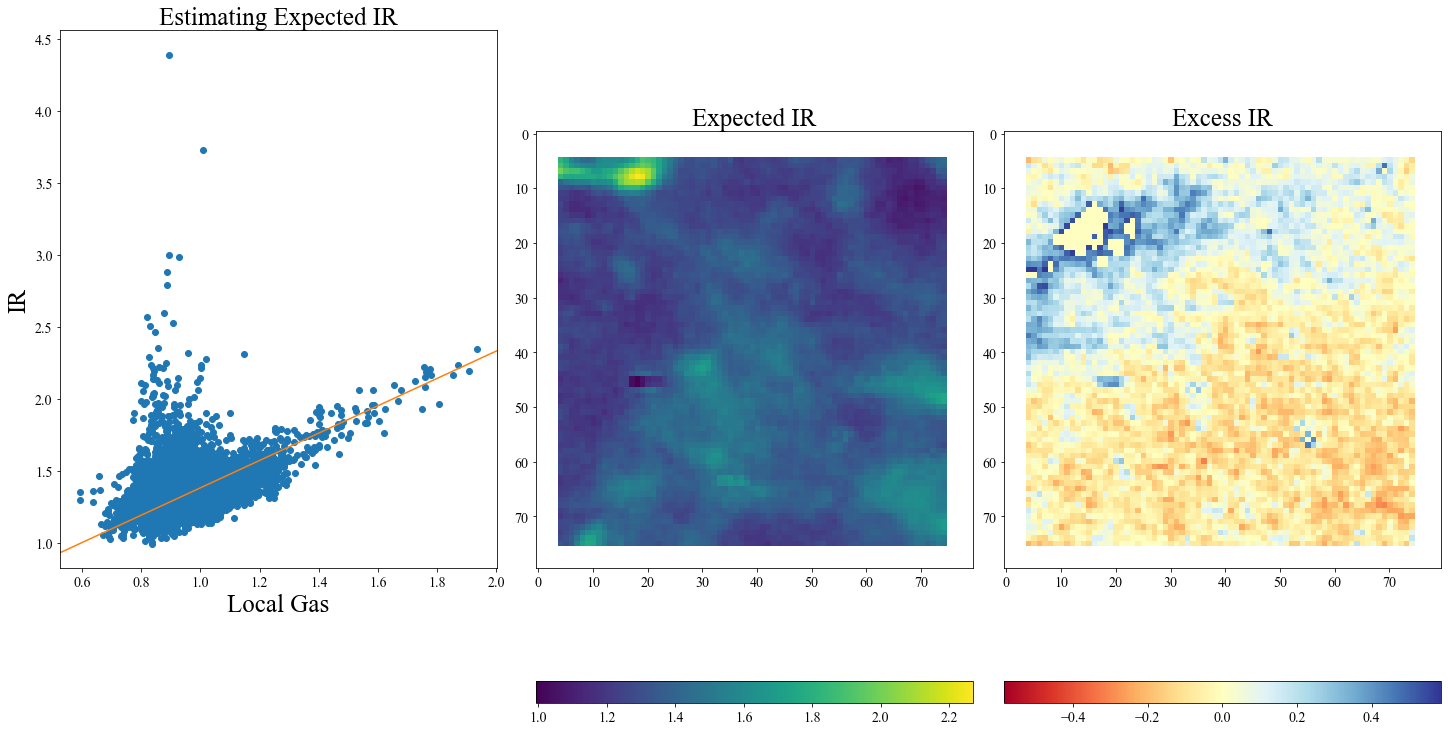

In [102]:
IR_exc3 = local_IR(file33, file32, 0.6, 1, 0.95, title = 'MKR290')

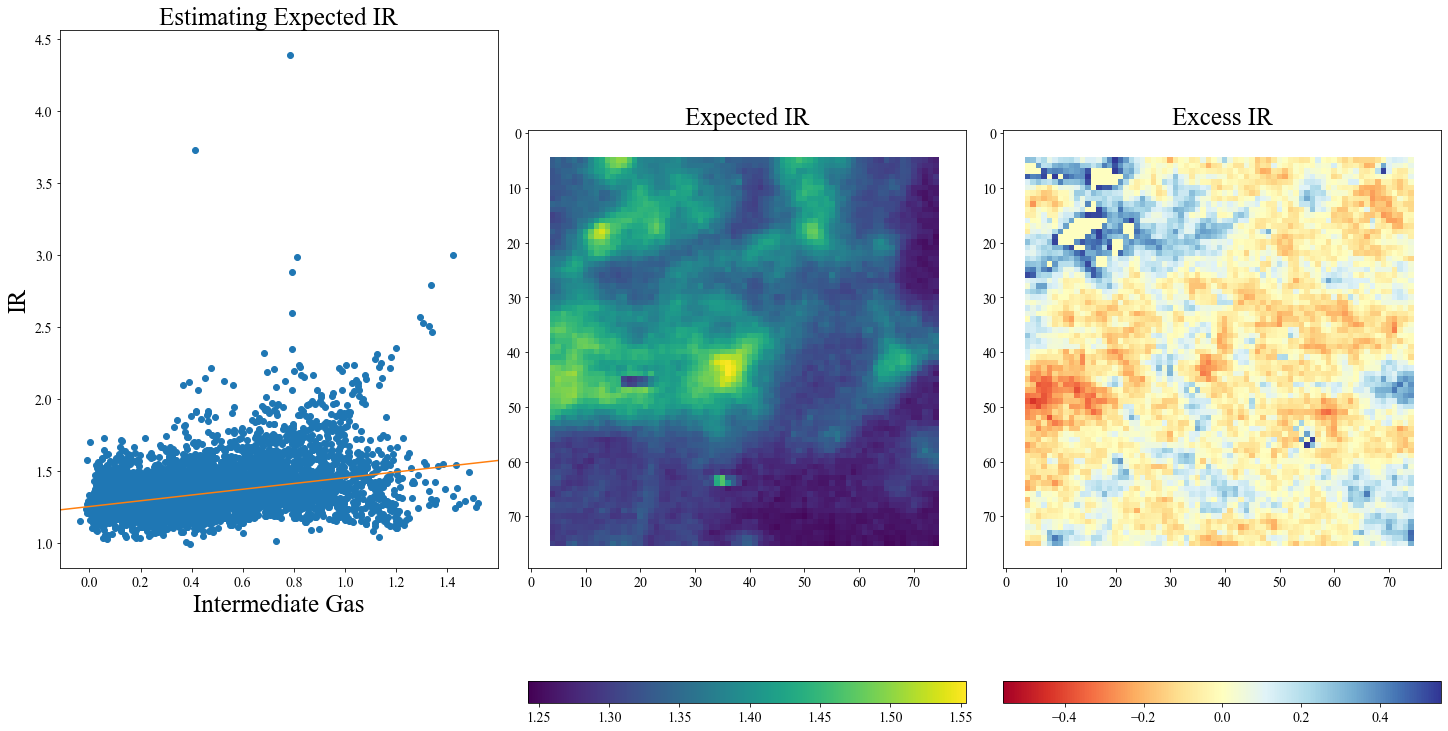

In [169]:
IR_exc33 = local_IR(file31, file32, 0, 1.25, 0.2, title = 'MKR290', inter = True)

(80, 80)


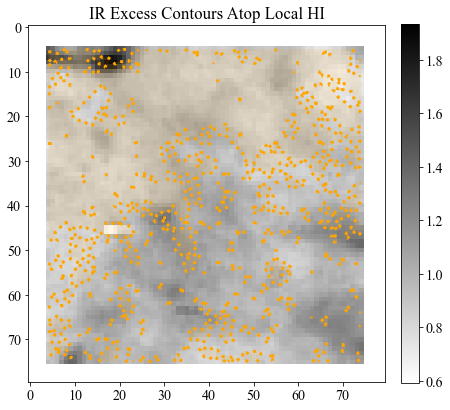

In [53]:
IR_overlay(file33, IR_exc3)

In [54]:
file41 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/PG0804/_inter_HI.fits')
file42 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/PG0804/_IR.fits')
file43 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/PG0804/_local_HI.fits')

NO EXCESS IR (backed by Pierre's work)

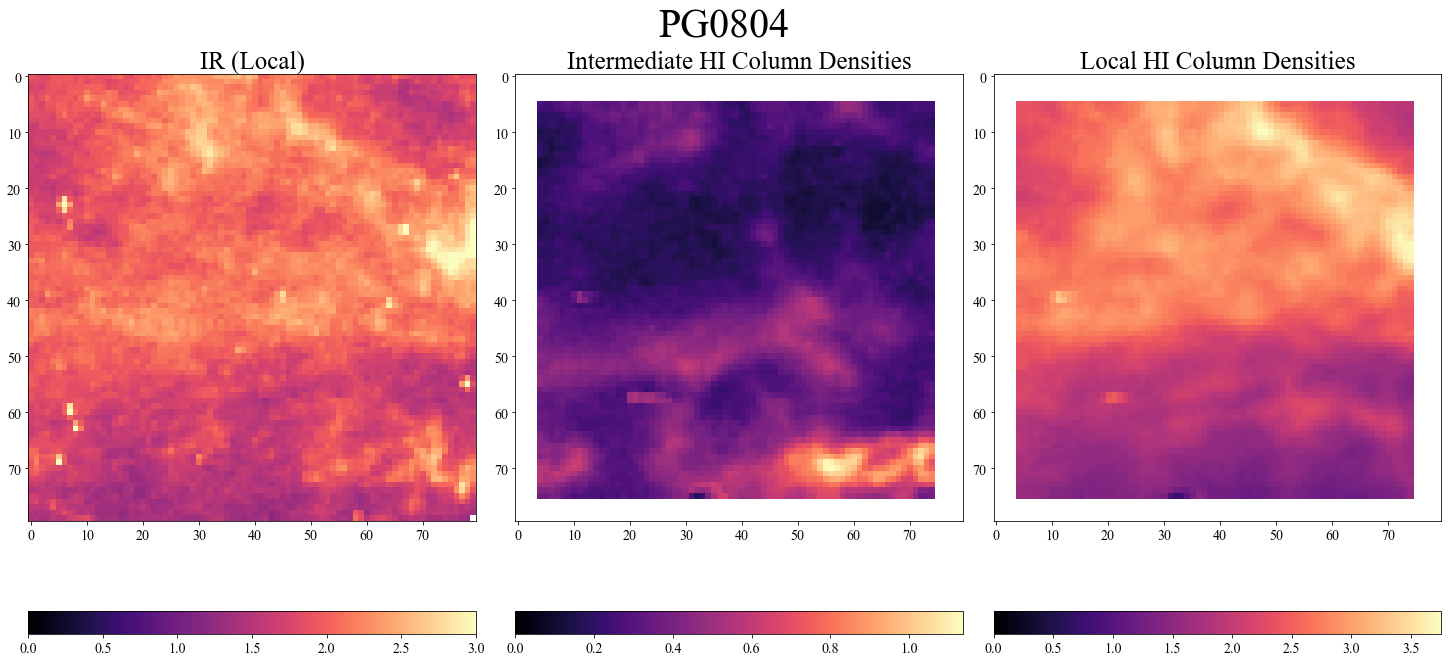

In [477]:
plot_file(file41, file42, file43, 'PG0804', vmax1 = 3)

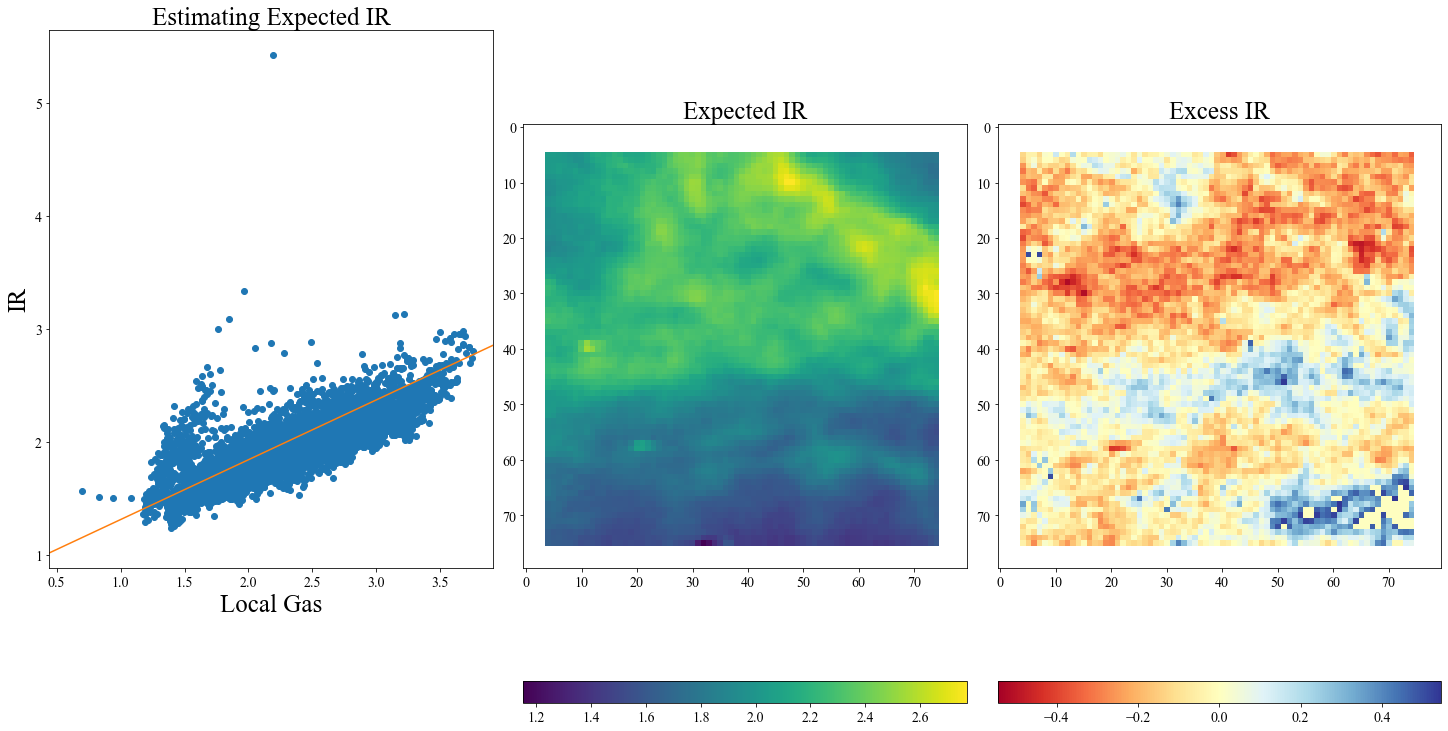

In [104]:
IR_exc4 = local_IR(file43, file42, 0.6, 1.1, 0.53, title = 'PG0804')

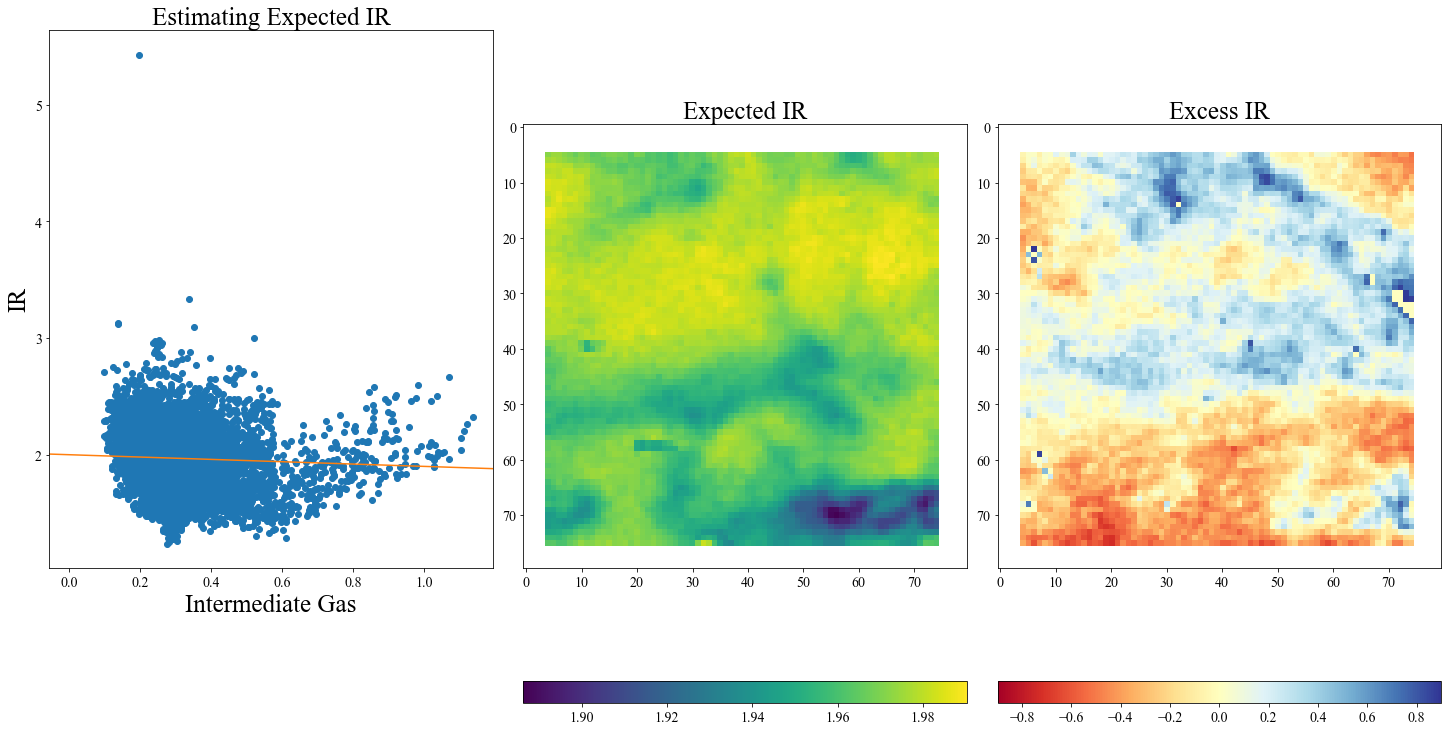

In [174]:
IR_exc44 = local_IR(file41, file42, 0, 2, -0.1, title = 'PG0804', inter = True)

(80, 80)


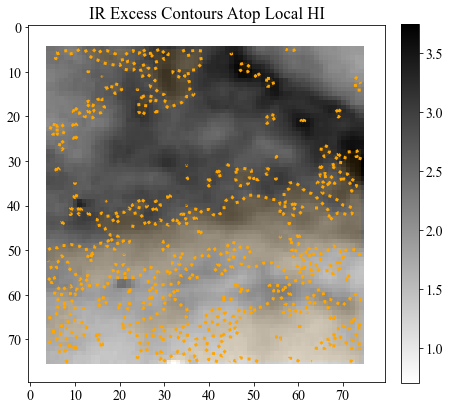

In [56]:
IR_overlay(file43, IR_exc4)

In [57]:
file51 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/HS0624/_inter_HI.fits')
file52 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/HS0624/_IR.fits')
file53 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/HS0624/_local_HI.fits')

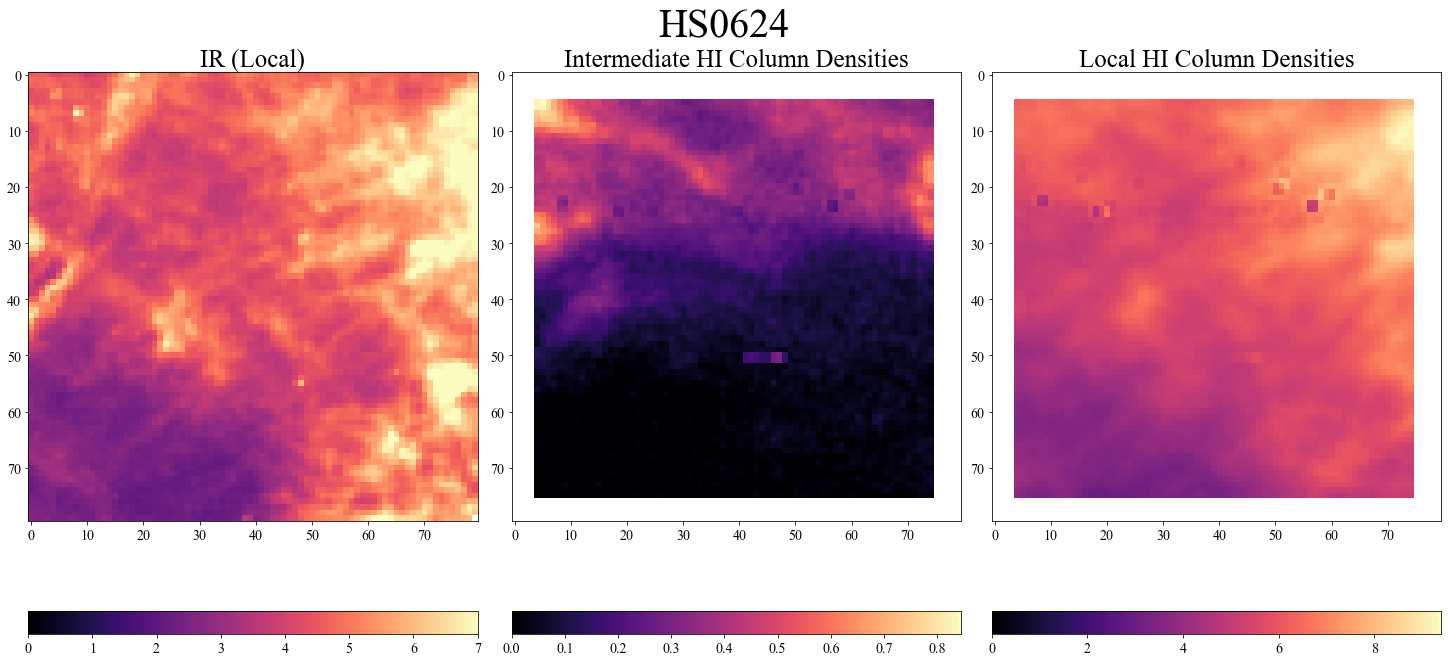

In [58]:
plot_file(file51, file52, file53, 'HS0624', vmax1 = 7)

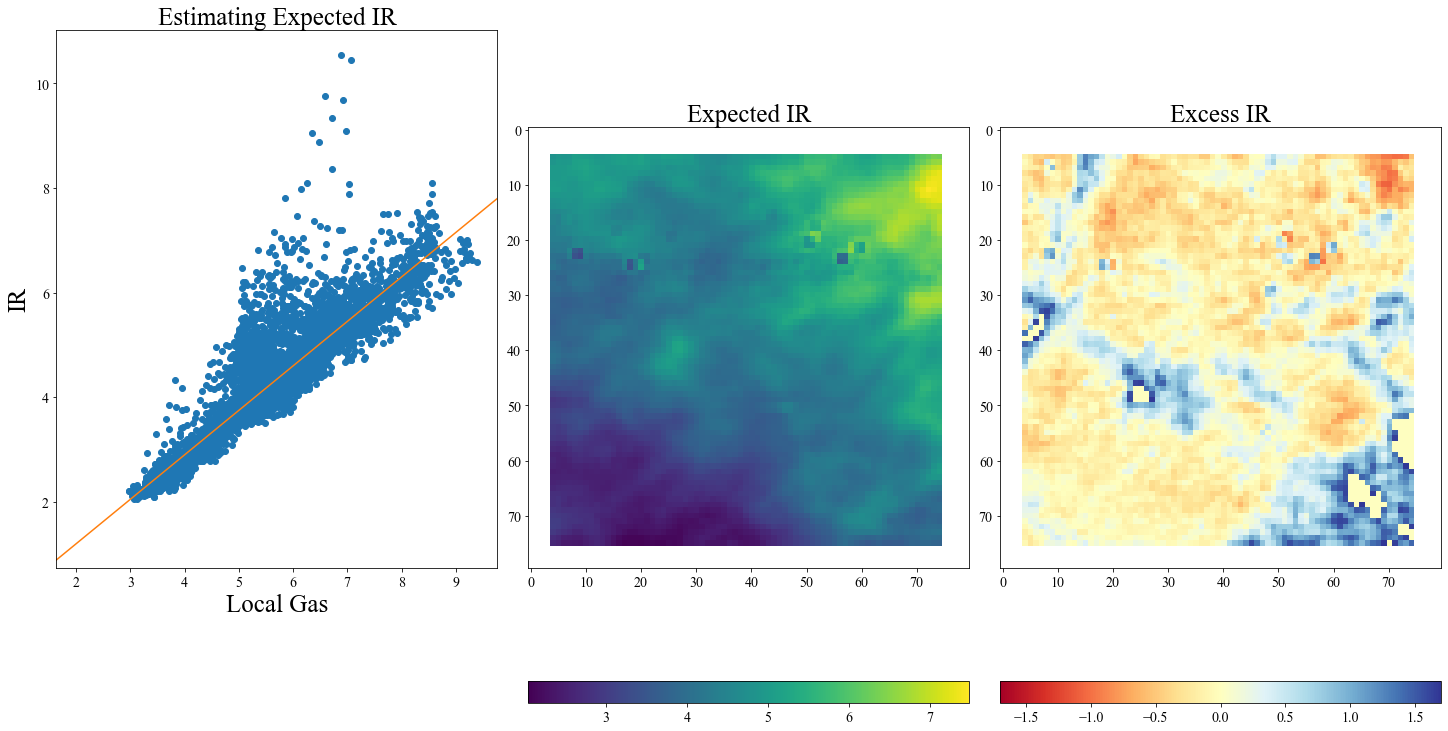

In [105]:
IR_exc5 = local_IR(file53, file52, 2, 1.2, 0.85, title = 'HS0624')

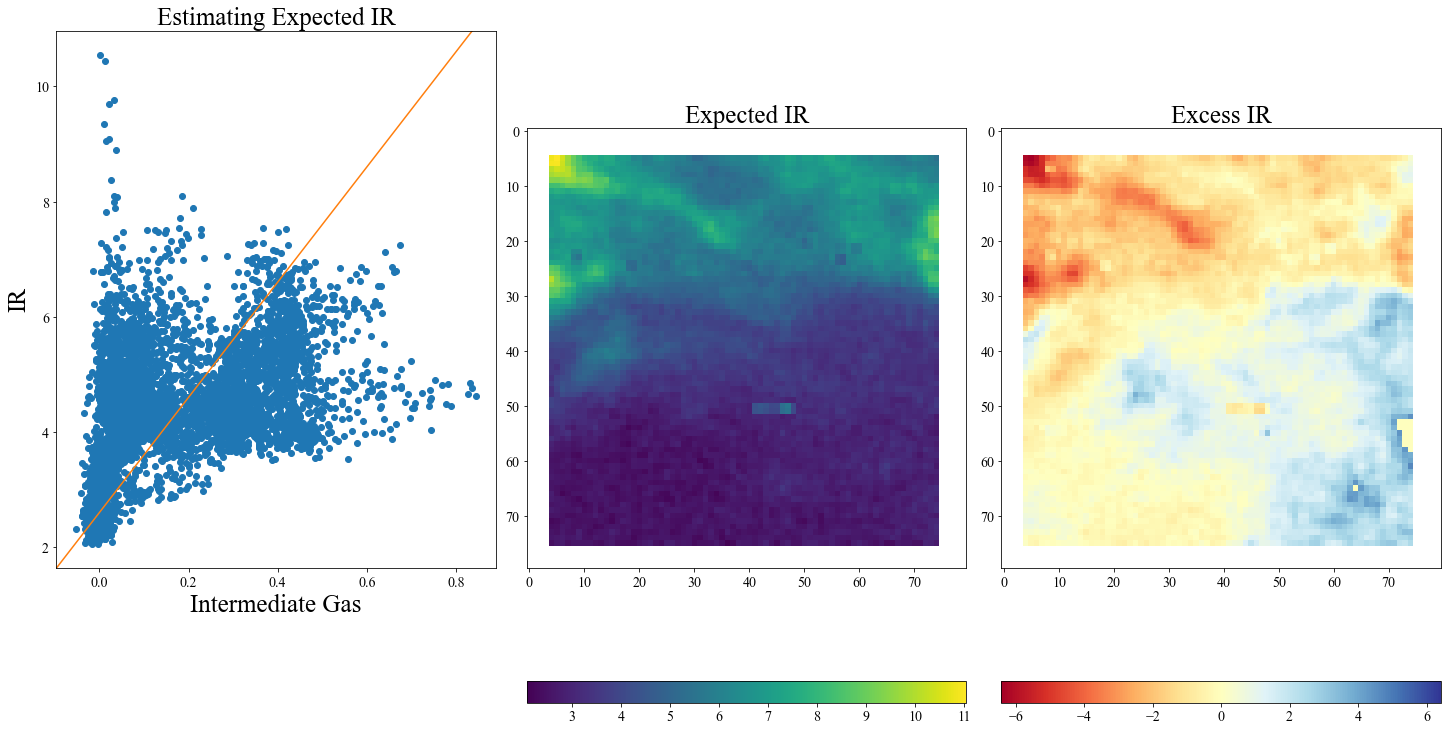

In [183]:
IR_exc55 = local_IR(file51, file52, 0, 2.6, 10, title = 'HS0624', inter = True)

(80, 80)


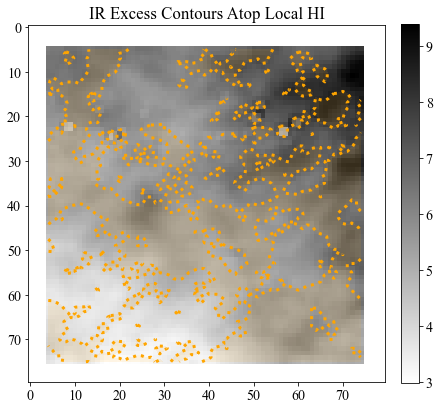

In [60]:
IR_overlay(file53, IR_exc5)

In [61]:
file61 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MBM23/_inter_HI.fits')
file62 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MBM23/_IR.fits')
file63 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MBM23/_local_HI.fits')

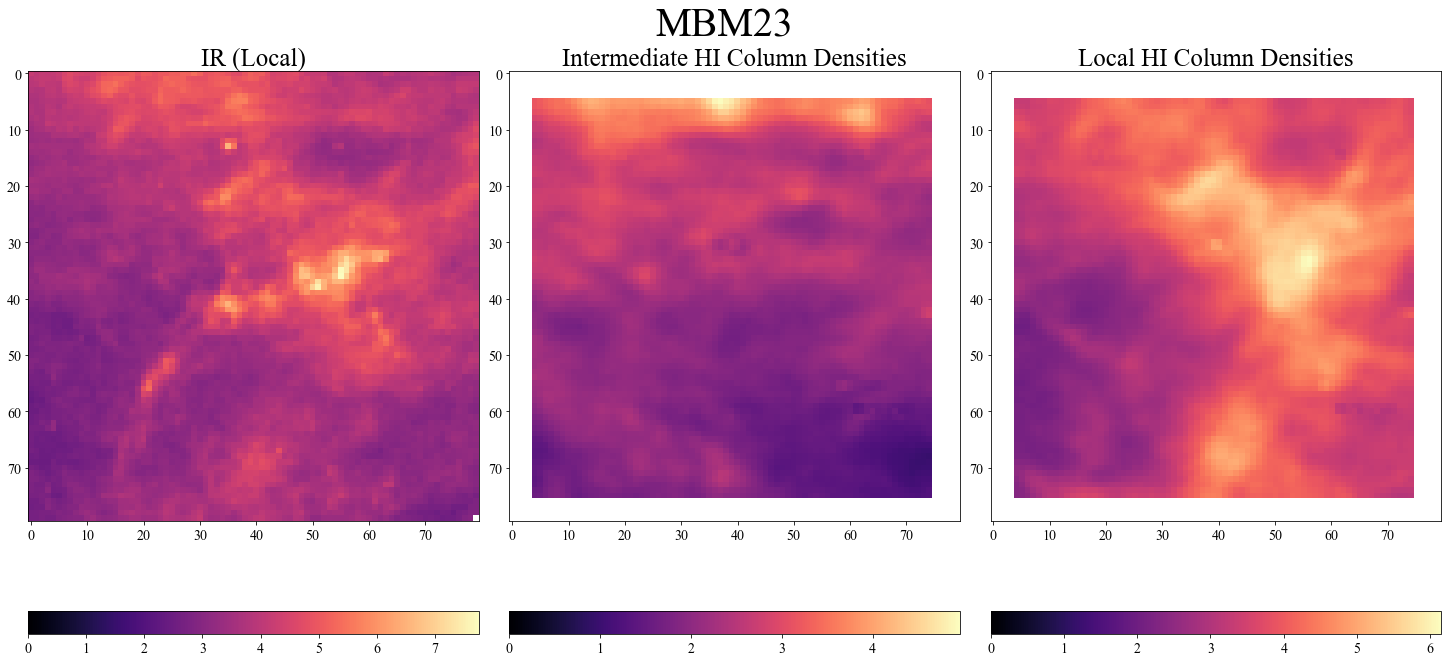

In [62]:
plot_file(file61, file62, file63, 'MBM23')

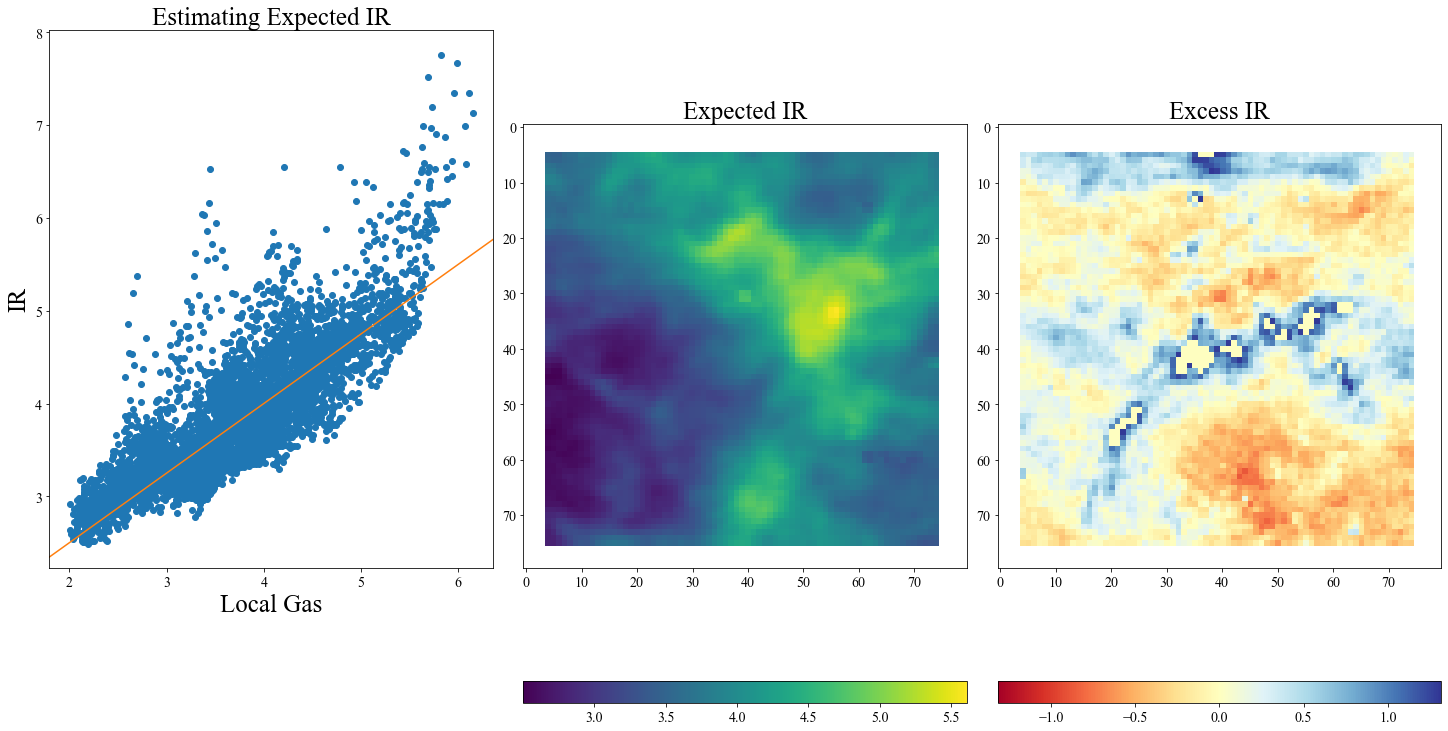

In [106]:
IR_exc6 = local_IR(file63, file62, 2, 2.5, 0.75, title = 'MBM23')

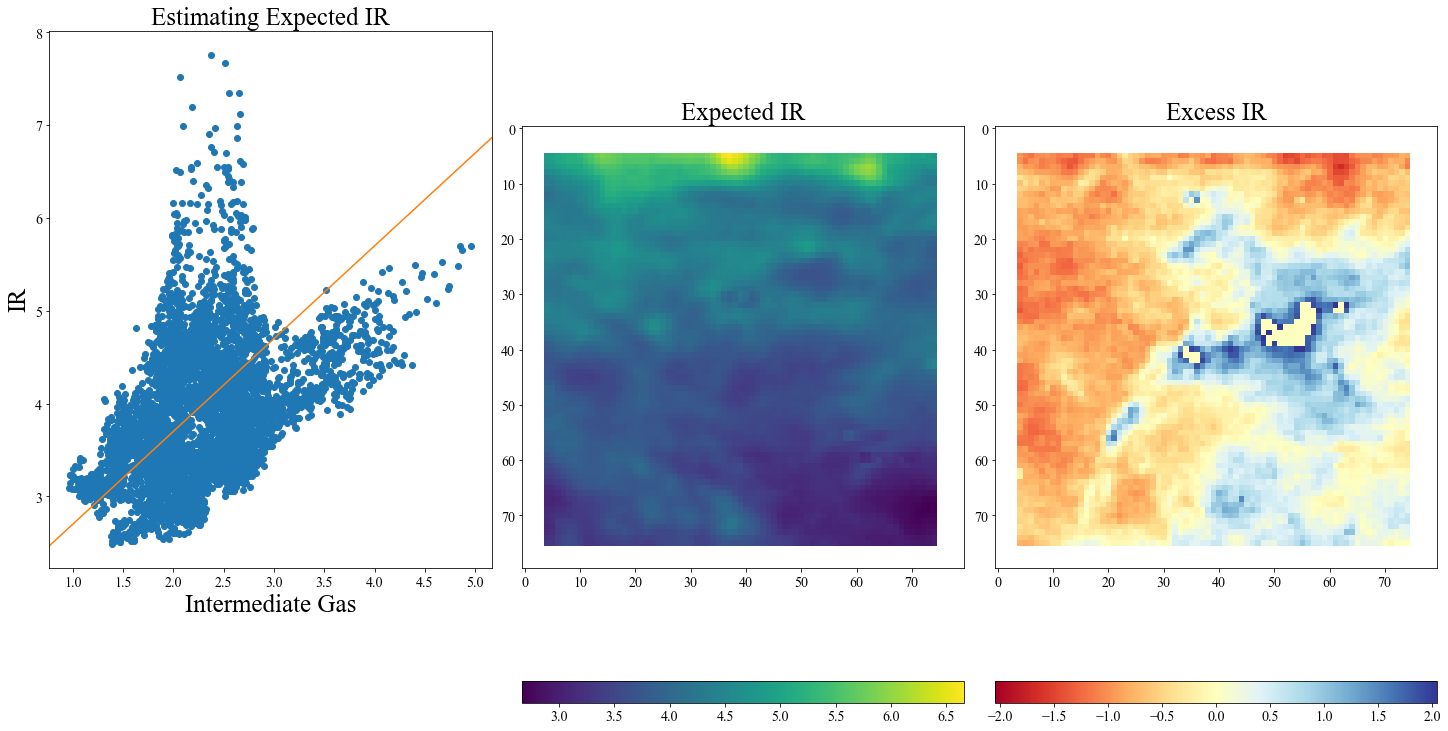

In [194]:
IR_exc66 = local_IR(file61, file62, 3, 4.7, 1, title = 'MBM23', inter = True)

(80, 80)


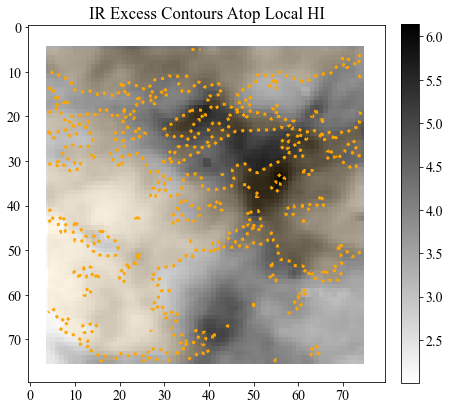

In [64]:
IR_overlay(file63, IR_exc6)

In [65]:
file71 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MKR421/_inter_HI.fits')
file72 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MKR421/_IR.fits')
file73 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MKR421/_local_HI.fits')

NO EXCESS IR (backed by Pierre's work)

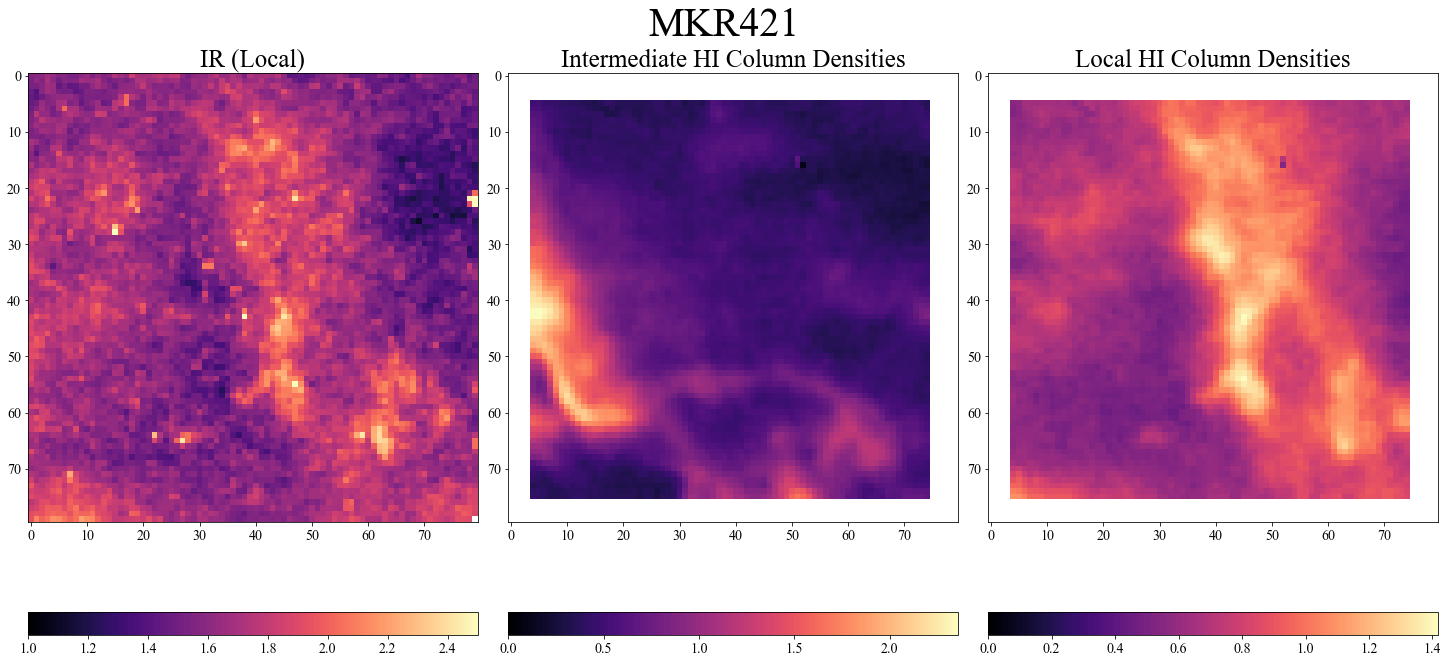

In [66]:
plot_file(file71, file72, file73, 'MKR421', vmin1 = 1, vmax1 = 2.5)

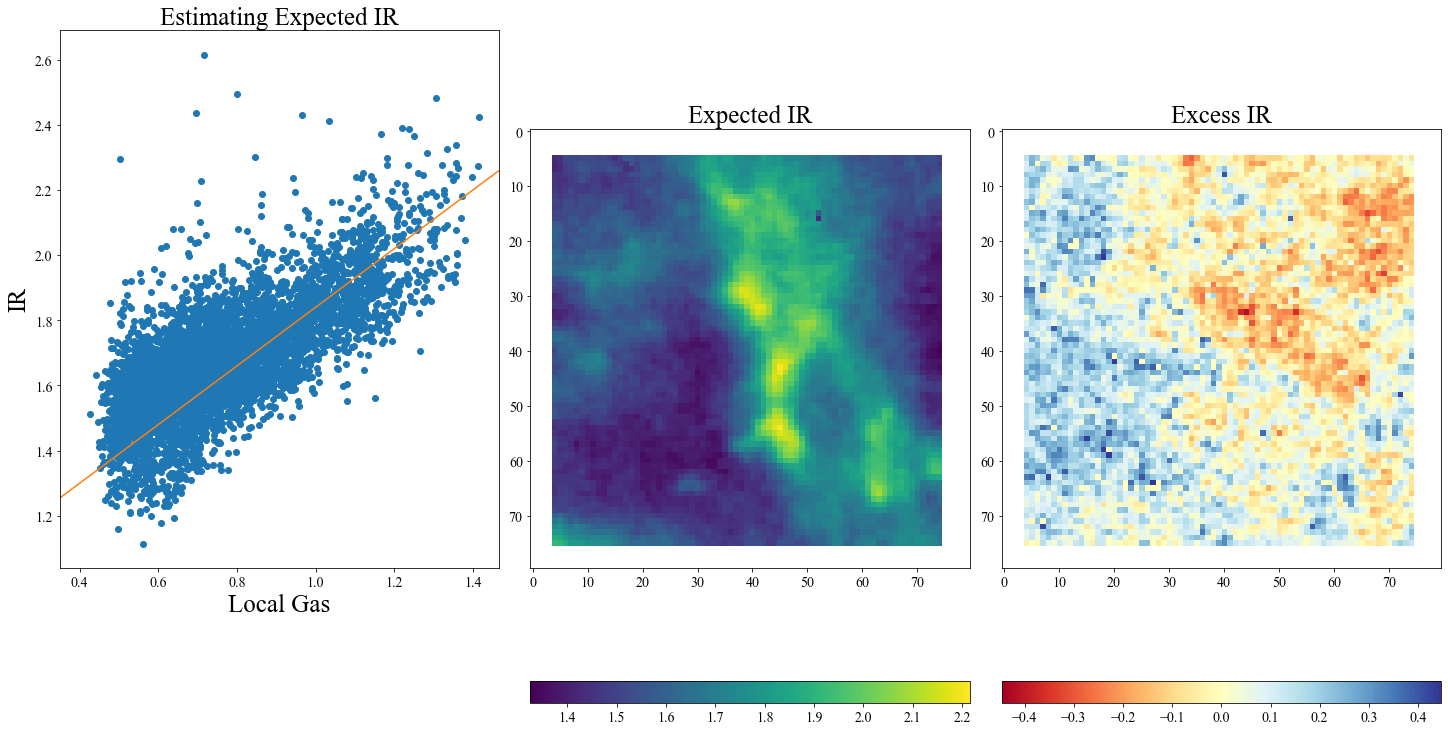

In [107]:
IR_exc7 = local_IR(file73, file72, 0.4, 1.3, 0.9, title = 'MKR421')

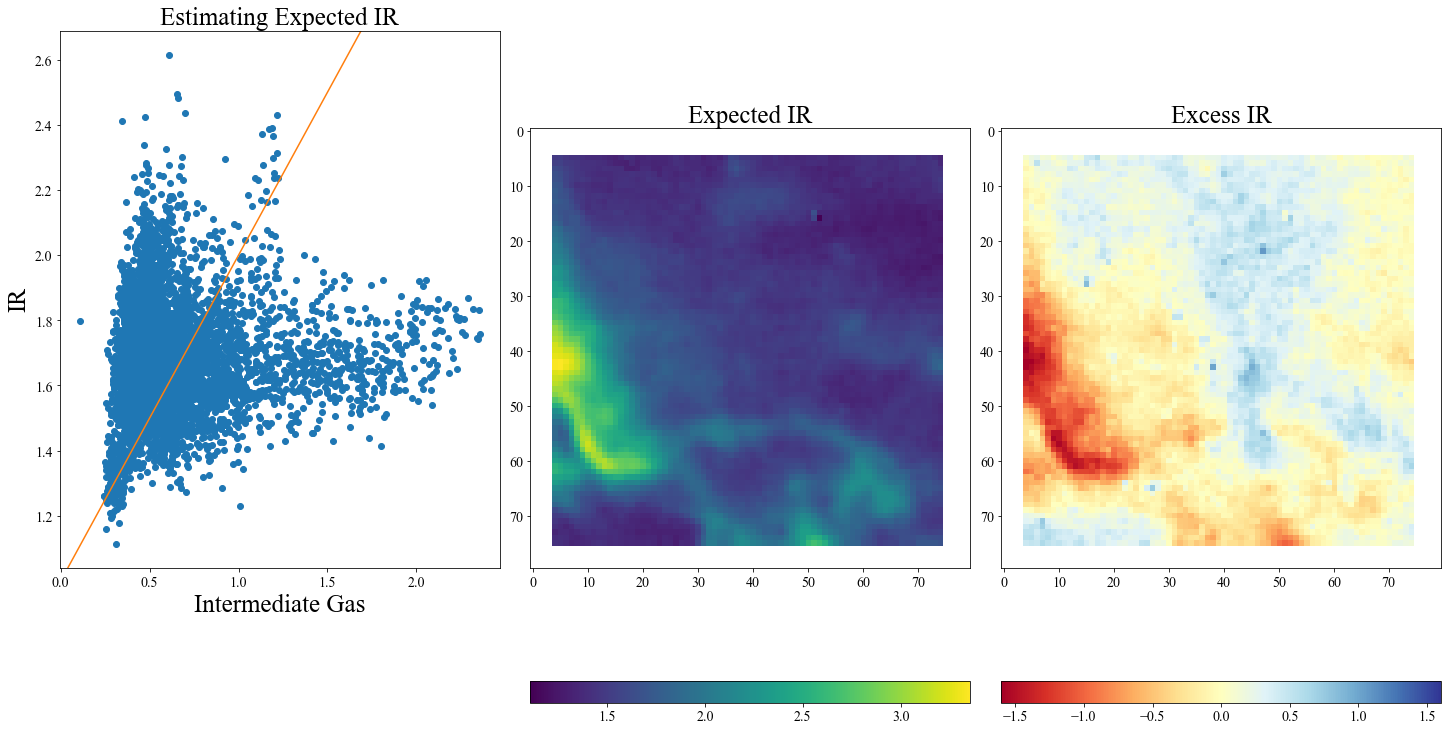

In [198]:
IR_exc77 = local_IR(file71, file72, 0.4, 1.4, 1, title = 'MKR421', inter = True)

(80, 80)


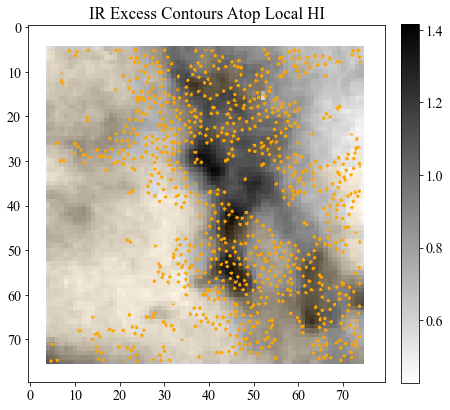

In [68]:
IR_overlay(file73, IR_exc7)

In [69]:
# make 2D header 

def make_flat_hdr(file):
    hdr = file[0].header
    
    # Make a 2D header 
    flathdr = fits.Header()
    flathdr["NAXIS   "] = 2
    flathdr["NAXIS1  "] = hdr["NAXIS1  "]
    flathdr["NAXIS2  "] = hdr["NAXIS2  "]
    flathdr["CRPIX1  "] = hdr["CRPIX1  "]
    flathdr["CRPIX2  "] = hdr["CRPIX2  "]
    flathdr["CRVAL1  "] = hdr["CRVAL1  "]
    flathdr["CRVAL2  "] = hdr["CRVAL2  "]
    flathdr["CDELT1  "] = hdr["CDELT1  "]
    flathdr["CDELT2  "] = hdr["CDELT2  "]
    flathdr["CTYPE1  "] = hdr["CTYPE1  "]
    flathdr["CTYPE2  "] = hdr["CTYPE2  "]
    flathdr["LONPOLE "] = hdr["LONPOLE "]
    flathdr["LATPOLE "] = hdr["LATPOLE "]
    
    return flathdr

In [79]:
file81_fh = make_flat_hdr(file81)
file91_fh = make_flat_hdr(file91)
file101_fh = make_flat_hdr(file101)
file111_fh = make_flat_hdr(file111)

file83_fh = make_flat_hdr(file83)
file93_fh = make_flat_hdr(file93)
file103_fh = make_flat_hdr(file103)
file113_fh = make_flat_hdr(file113)


In [80]:
new_hdr = fits.Header()
new_hdr["NAXIS   "] = file82[0].header["NAXIS  "]
new_hdr["NAXIS1  "] = file82[0].header["NAXIS1  "]
new_hdr["NAXIS2  "] = file82[0].header["NAXIS2  "]
    
new_hdr["CRPIX1  "] = file82[0].header["CRPIX1  "]
new_hdr["CRPIX2  "] = file82[0].header["CRPIX2  "]

new_hdr["CRVAL1  "] = file82[0].header["CRVAL1  "]
new_hdr["CRVAL2  "] = file82[0].header["CRVAL2  "]
    
new_hdr["CDELT1  "] = file82[0].header["CDELT1  "]
new_hdr["CDELT2  "] = file82[0].header["CDELT2  "]
    
new_hdr["CTYPE1  "] = file82[0].header["CTYPE1  "]
new_hdr["CTYPE2  "] = file82[0].header["CTYPE2  "]
    
new_hdr["LONPOLE "] = file82[0].header["LONPOLE "]
new_hdr["LATPOLE "] = file82[0].header["LATPOLE "]

URSA_new_inter, ftpt = reproject_and_coadd([(file81[0].data, file81_fh), (file91[0].data, file91_fh), 
                                      (file101[0].data,file101_fh), (file111[0].data, file111_fh)],
                                    new_hdr, reproject_function = reproject_exact)
URSA_new_loc, ftpt2 = reproject_and_coadd([(file83[0].data, file83_fh), (file93[0].data, file93_fh), 
                                      (file103[0].data,file103_fh), (file113[0].data, file113_fh)],
                                    new_hdr, reproject_function = reproject_exact)

In [81]:
file81 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/URSA/URSA_CENTER_inter_HI.fits')
file82 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/URSA/URSA_CENTER_IR.fits')
file83 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/URSA/URSA_CENTER_local_HI.fits')

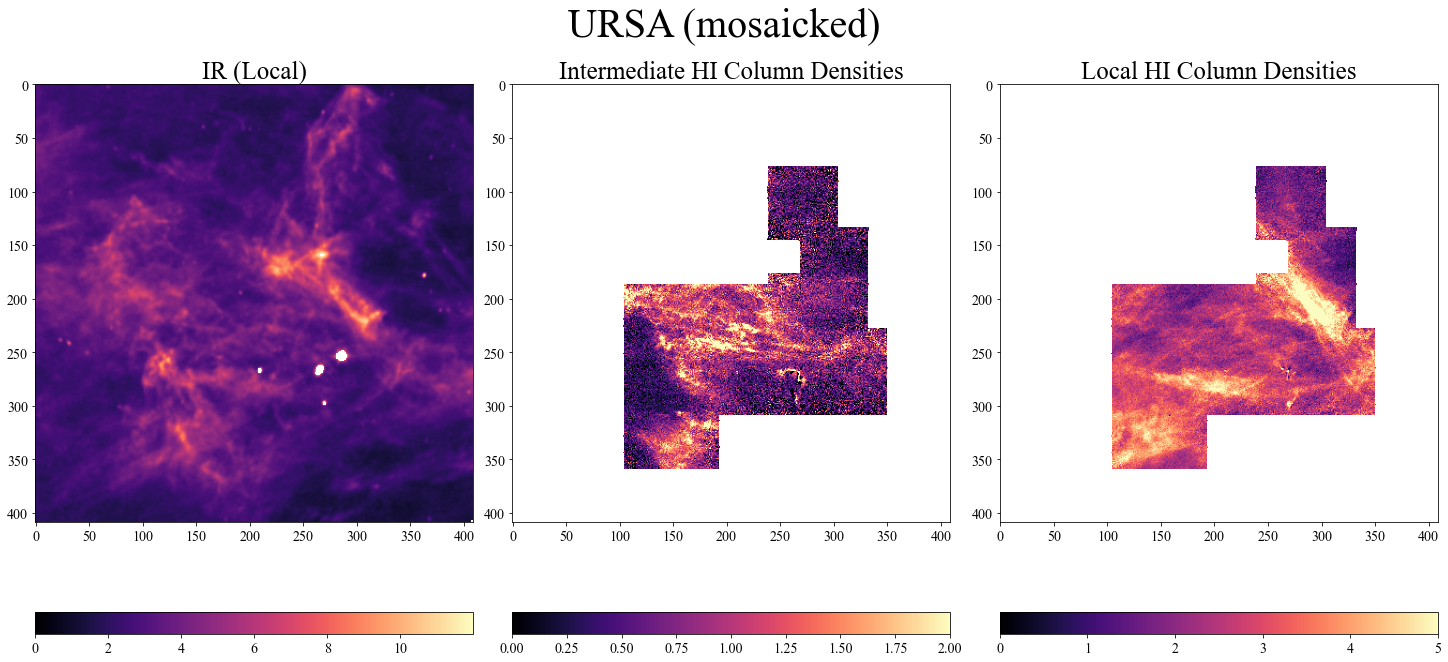

In [83]:
plot_file(URSA_new_inter, file82, URSA_new_loc, 'URSA (mosaicked)', vmax2 = 2, vmax3 = 5, mos = True)

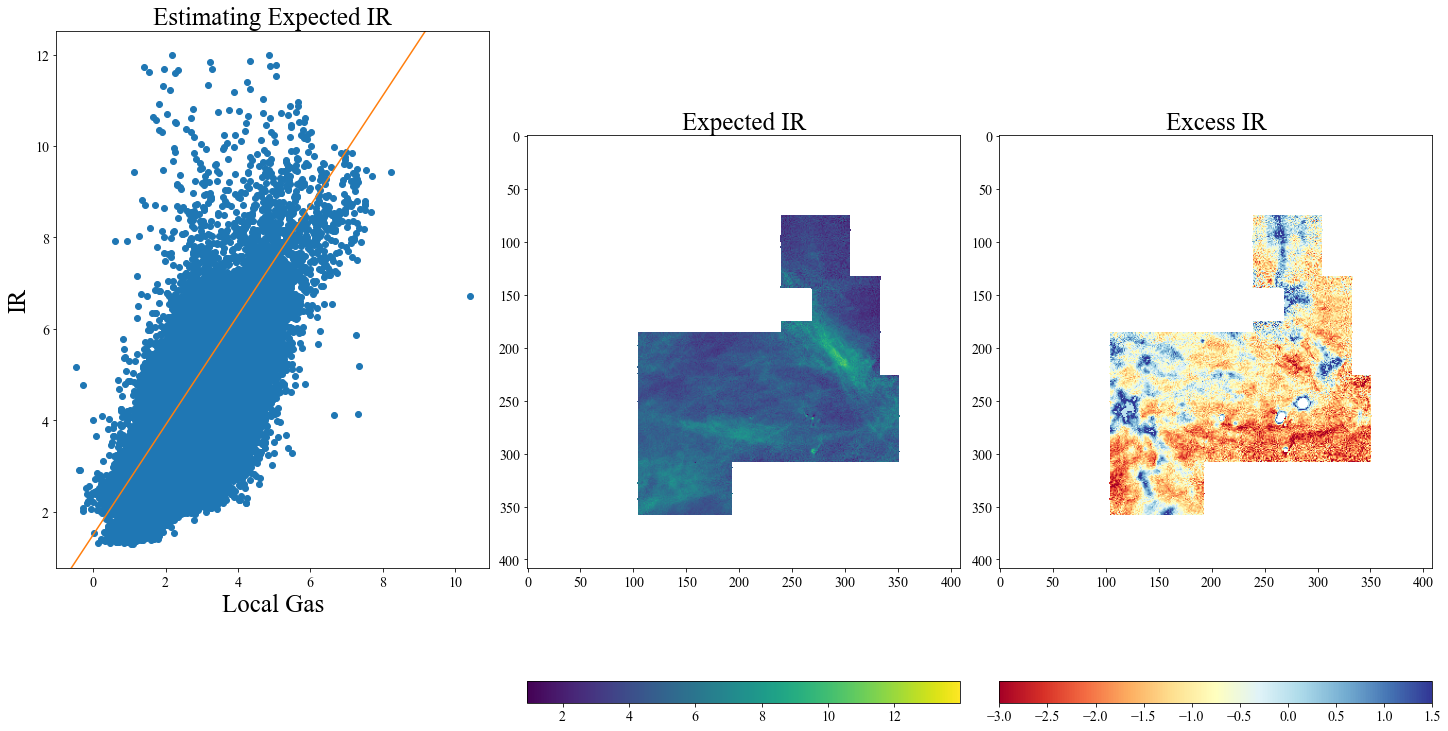

In [110]:
IR_exc8 = local_IR(URSA_new_loc, file82[0].data[0:409, 0:409], 0, 1.5, 1.2, vmax = 1.5, vmin = -3, rav = False, title = 'URSA')


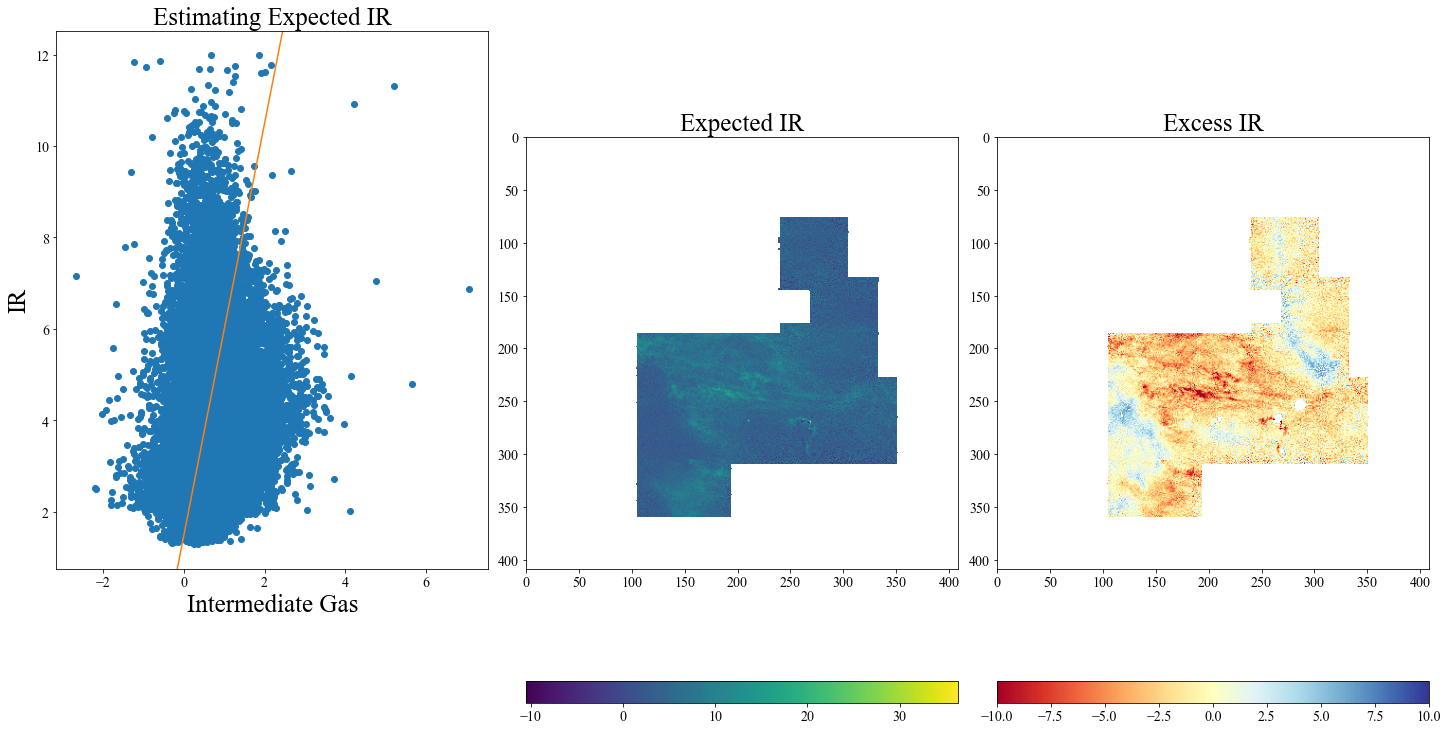

In [204]:
IR_exc8 = local_IR(URSA_new_inter, file82[0].data[0:409, 0:409], 0, 1.5, 4.5, vmin = -10, vmax = 10, rav = False, title = 'URSA', inter = True)


(409, 409)


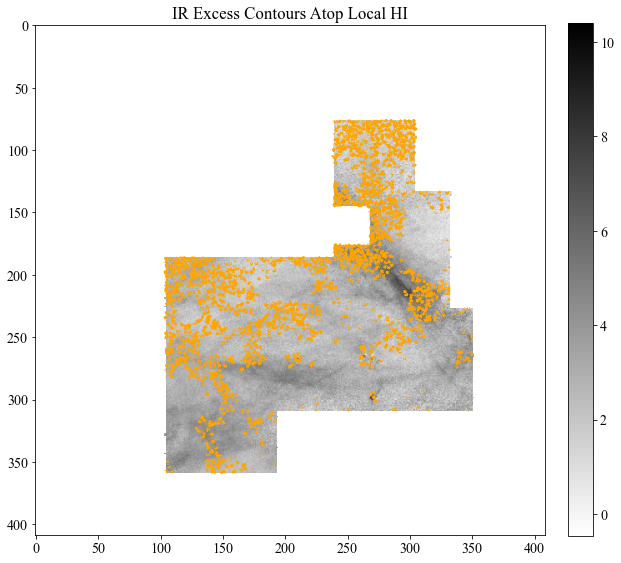

In [85]:
IR_overlay(URSA_new_loc, IR_exc8, URSA = True)

In [72]:
file91 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/URSA/URSA_LEO_inter_HI.fits')
file93 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/URSA/URSA_LEO_local_HI.fits')
file91.info()

Filename: /Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/URSA/URSA_LEO_inter_HI.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      21   (409, 409)   float64   


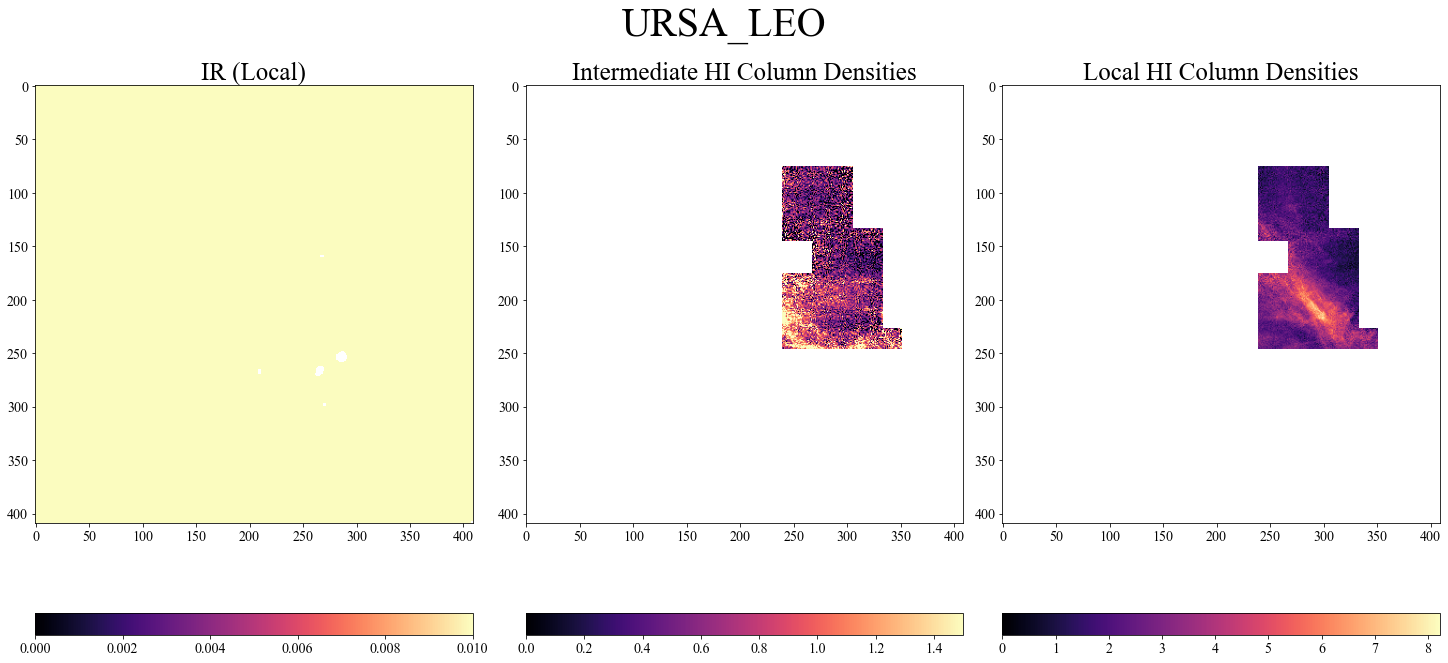

In [86]:
plot_file(file91, file82, file93, 'URSA_LEO', vmax1 = 0.01, vmax2 = 1.5)

In [75]:
file101 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/URSA/URSA_LIZST_2_inter_HI.fits')
file103 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/URSA/URSA_LIZST_2_local_HI.fits')

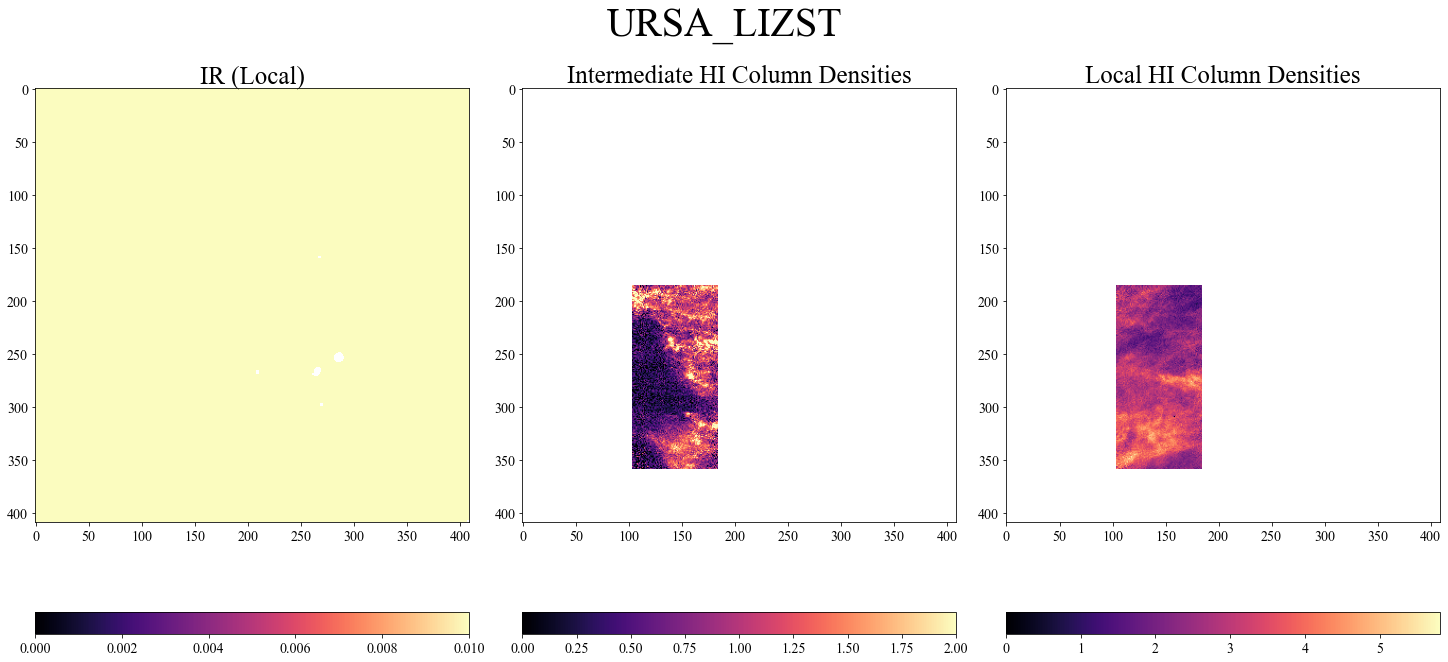

In [87]:
plot_file(file101, file82, file103, 'URSA_LIZST', vmax1 = 0.01, vmax2 = 2)

In [76]:
file111 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/URSA/URSA_MAJOR_GLS_inter_HI.fits')
file113 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/URSA/URSA_MAJOR_GLS_local_HI.fits')

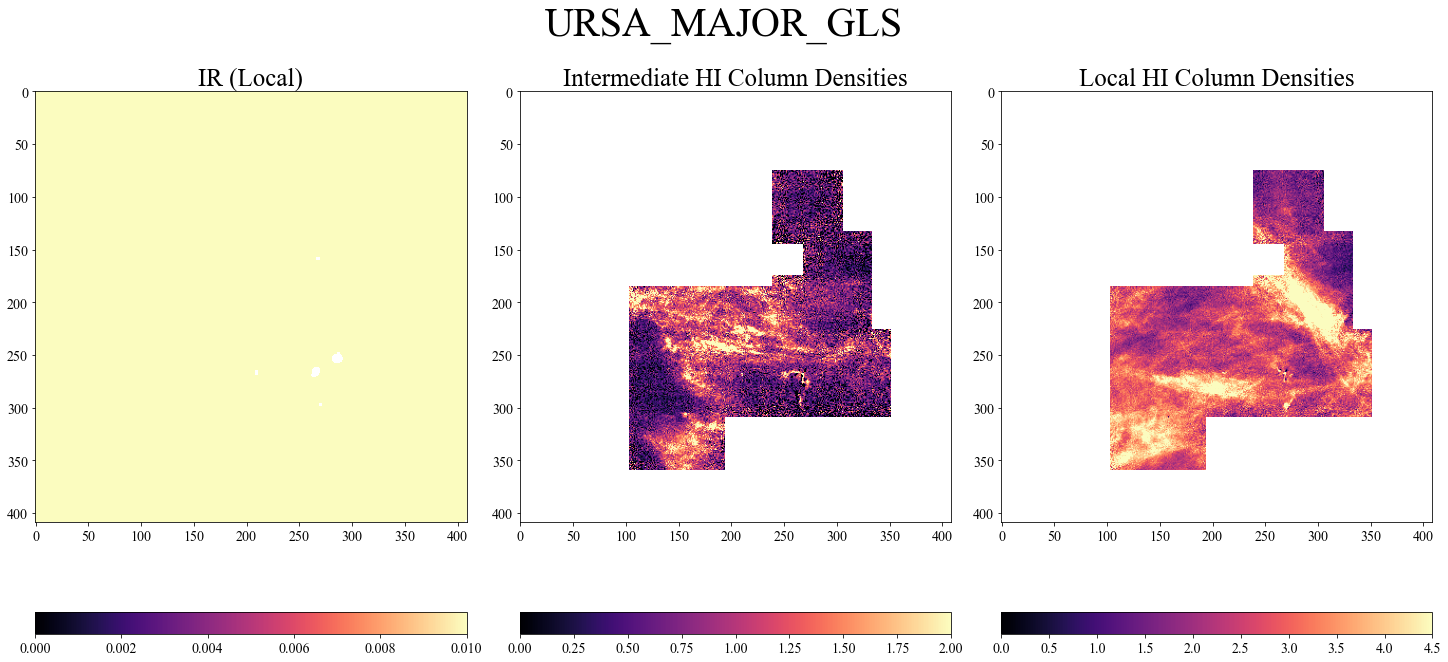

In [88]:
plot_file(file111, file82, file113, 'URSA_MAJOR_GLS', vmax1 = 0.01, vmax3 = 4.5, vmax2 = 2)

In [77]:
file121 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/LOOP1_2/_inter_HI.fits')
file122 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/LOOP1_2/_IR.fits')
file123 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/LOOP1_2/_local_HI.fits')

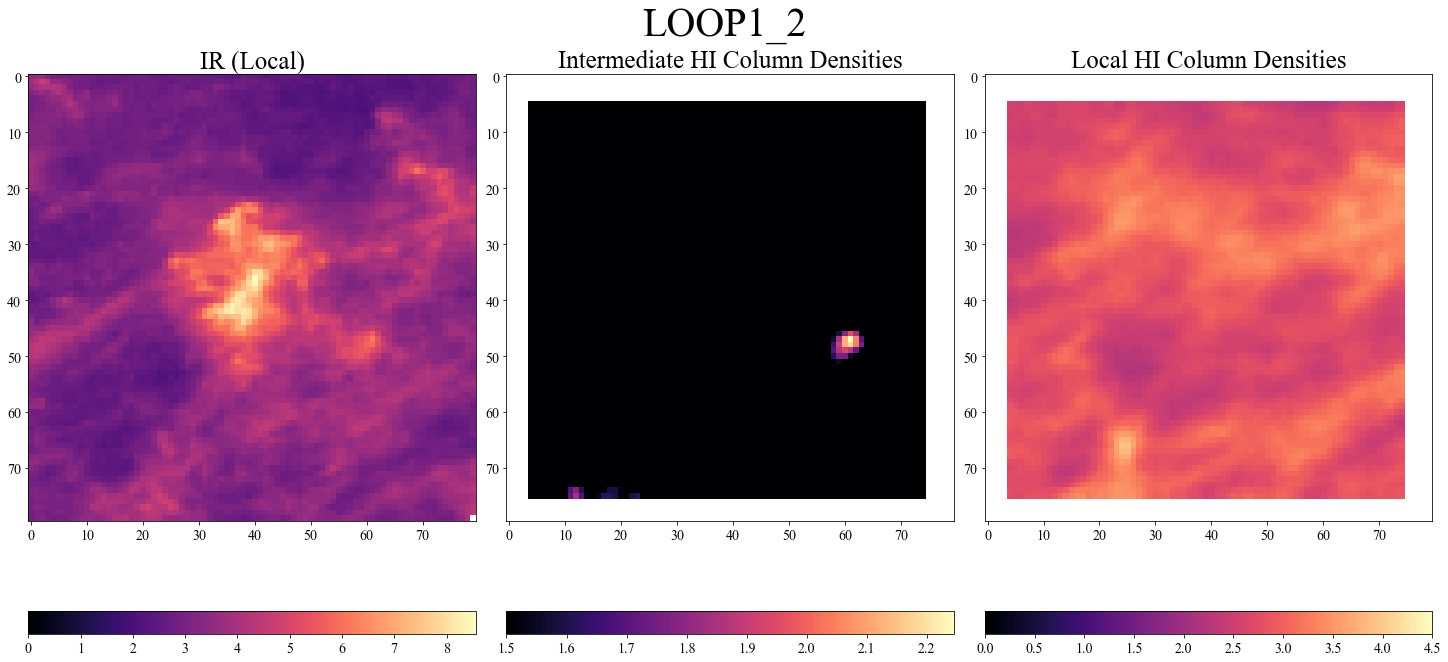

In [111]:
plot_file(file121, file122, file123, 'LOOP1_2', vmin2 = 1.5, vmax3 = 4.5)

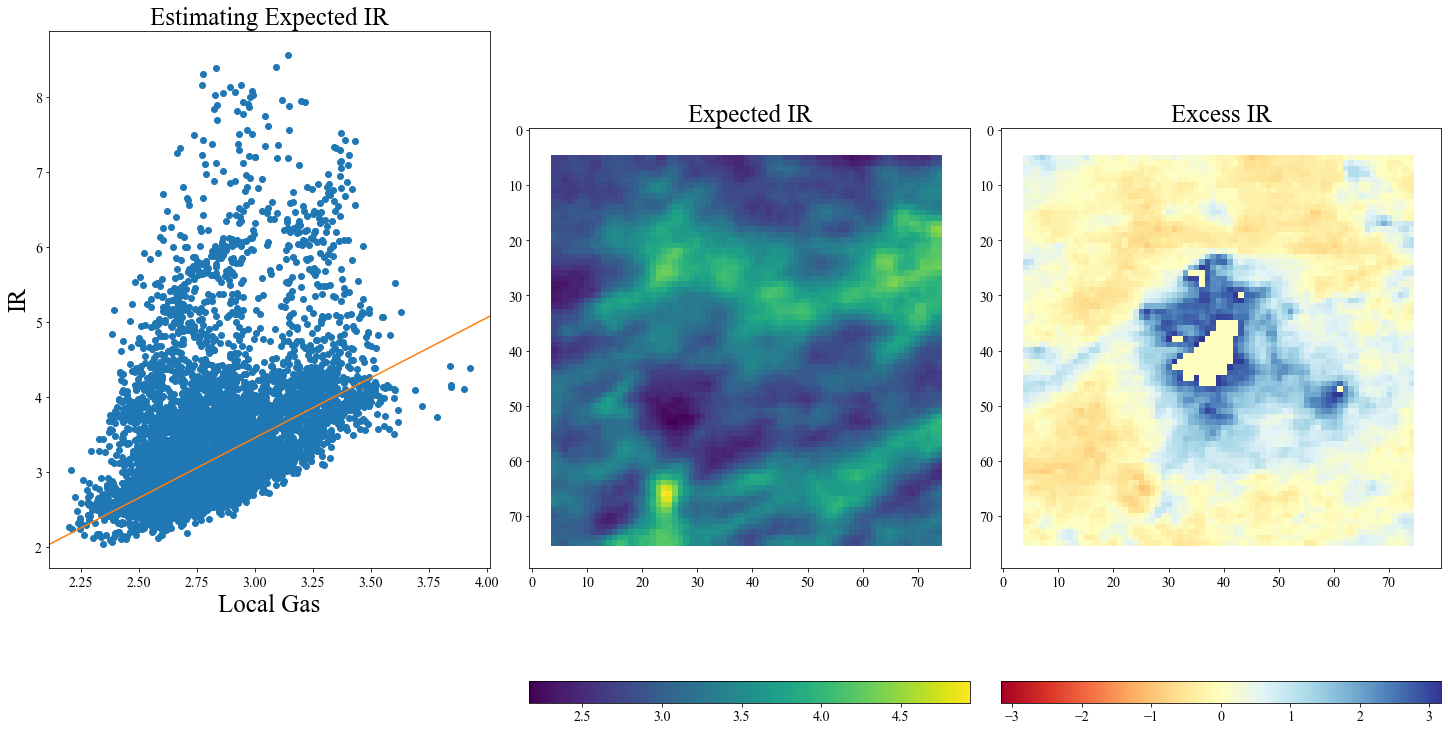

In [120]:
IR_exc12 = local_IR(file123, file122, 2.25, 2.25, 1.6, vmin = -1, title = 'LOOP1_2')

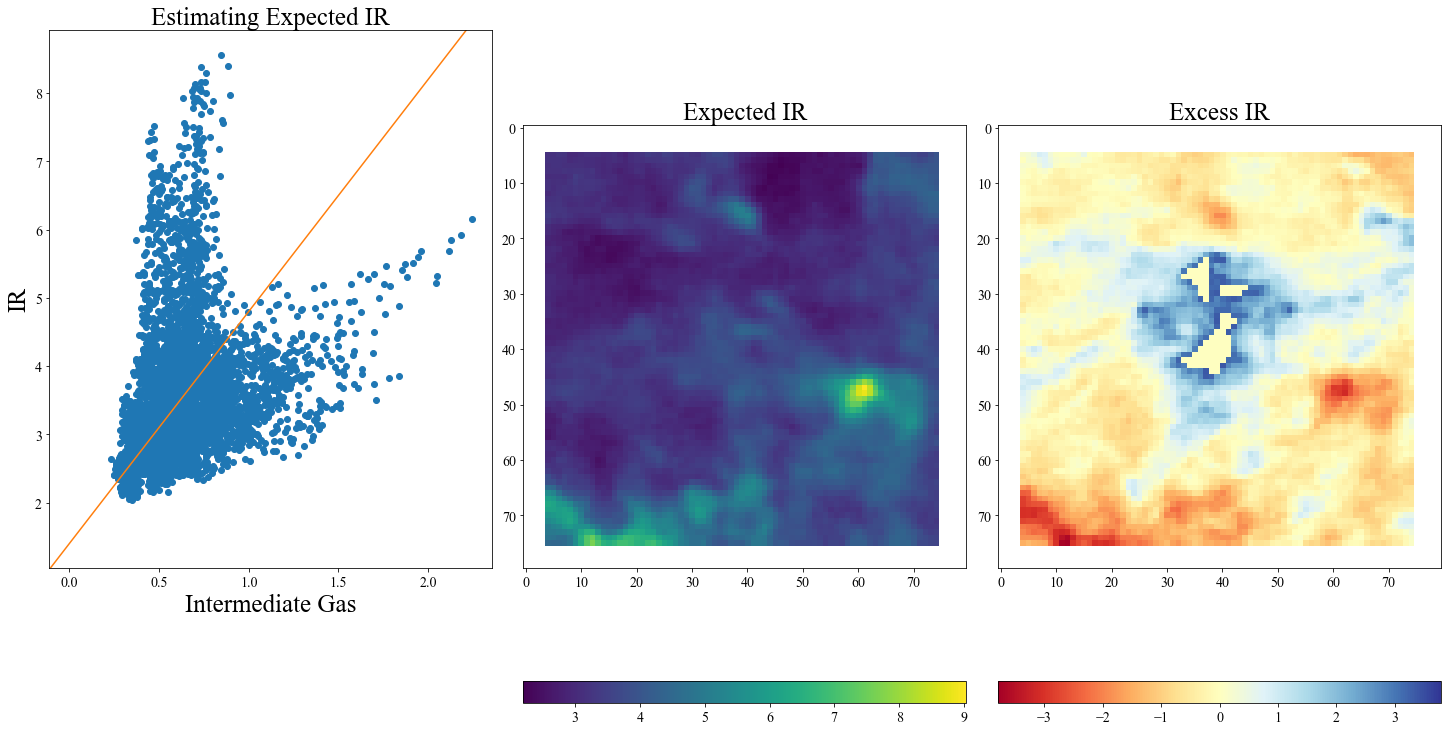

In [212]:
IR_exc222 = local_IR(file121, file122, 0, 1.4, 3.4, title = 'LOOP1_2', inter = True)

(80, 80)


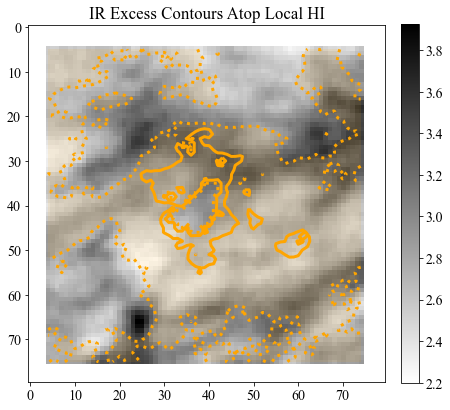

In [114]:
IR_overlay(file123, IR_exc12)

In [78]:
file131 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MKR9/_inter_HI.fits')
file132 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MKR9/_IR.fits')
file133 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MKR9/_local_HI.fits')

NO EXCESS IR (backed by Pierre's work)

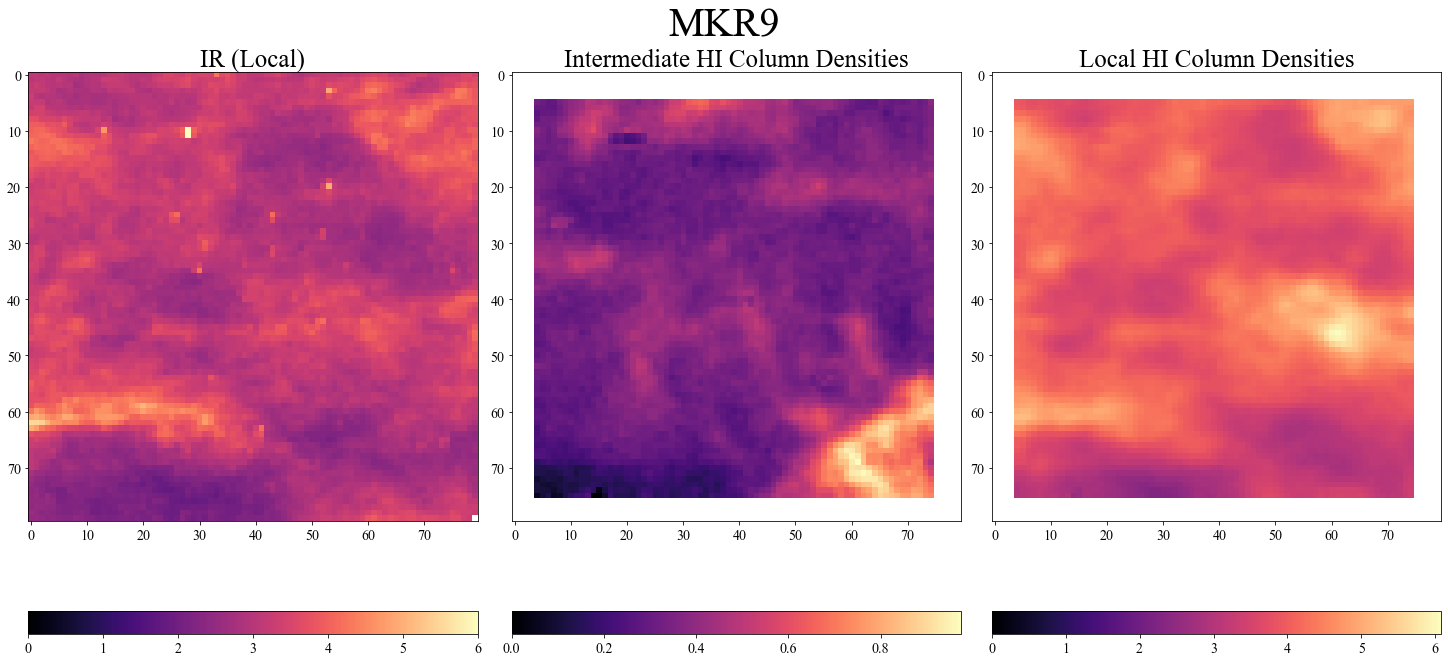

In [92]:
plot_file(file131, file132, file133, 'MKR9', vmax1 = 6)

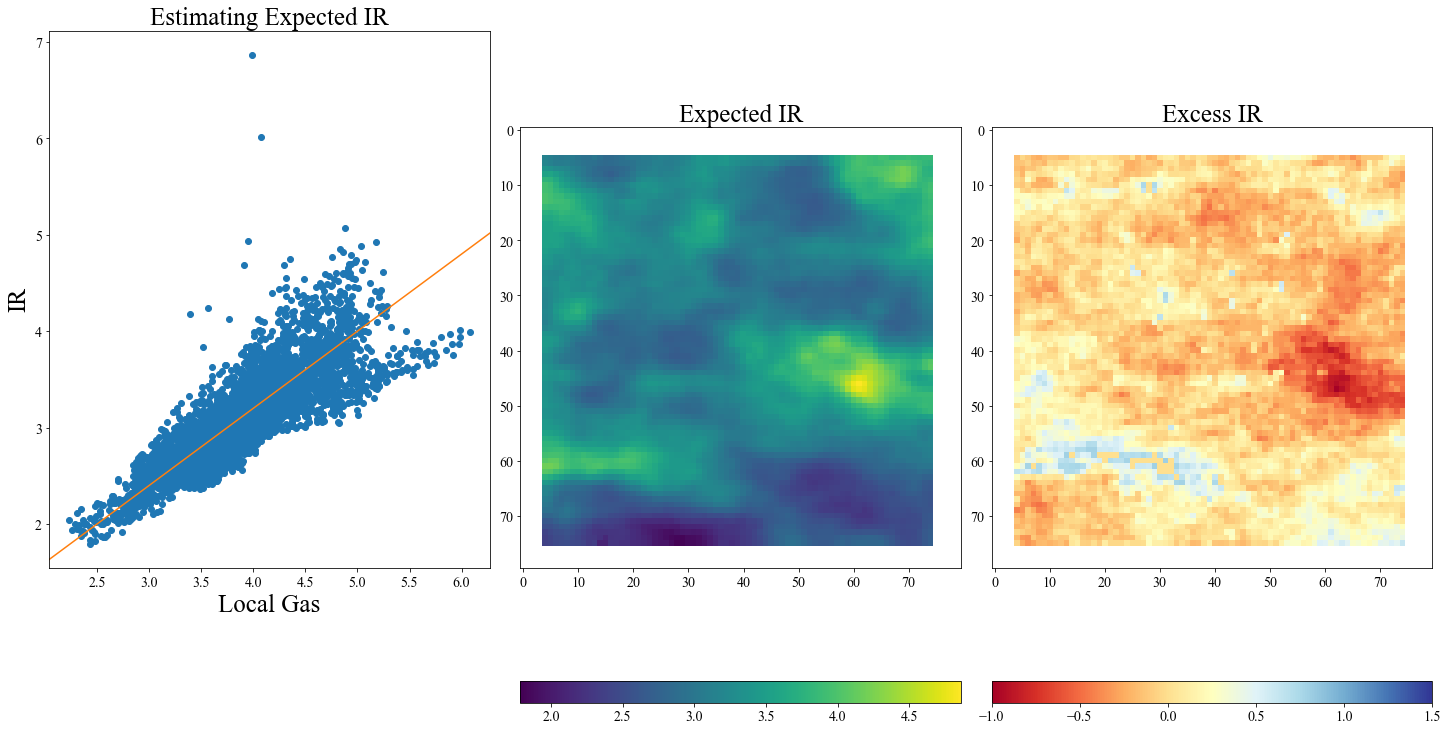

In [115]:
IR_exc13 = local_IR(file133, file132, 2.5, 2, 0.8, vmax = 1.5, vmin = -1, title = 'MKR9')

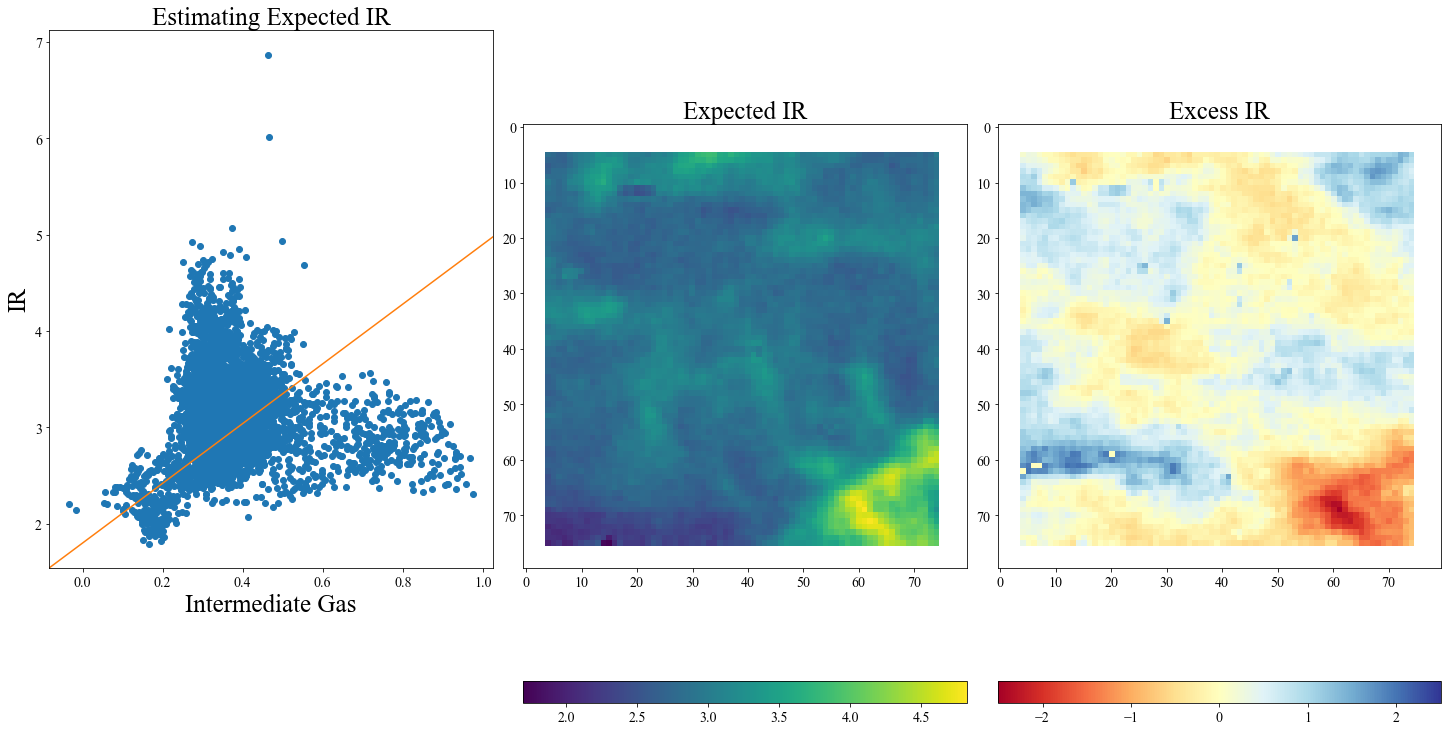

In [220]:
IR_exc333 = local_IR(file131, file132, 0, 1.8, 3.1, title = 'MKR9', inter = True)

(80, 80)


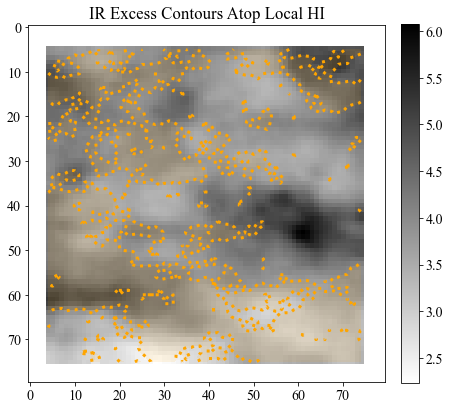

In [116]:
IR_overlay(file133, IR_exc13)

In [117]:
file141 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MS0700/_inter_HI.fits')
file142 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MS0700/_IR.fits')
file143 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MS0700/_local_HI.fits')

NO EXCESS IR (backed by Pierre's work)

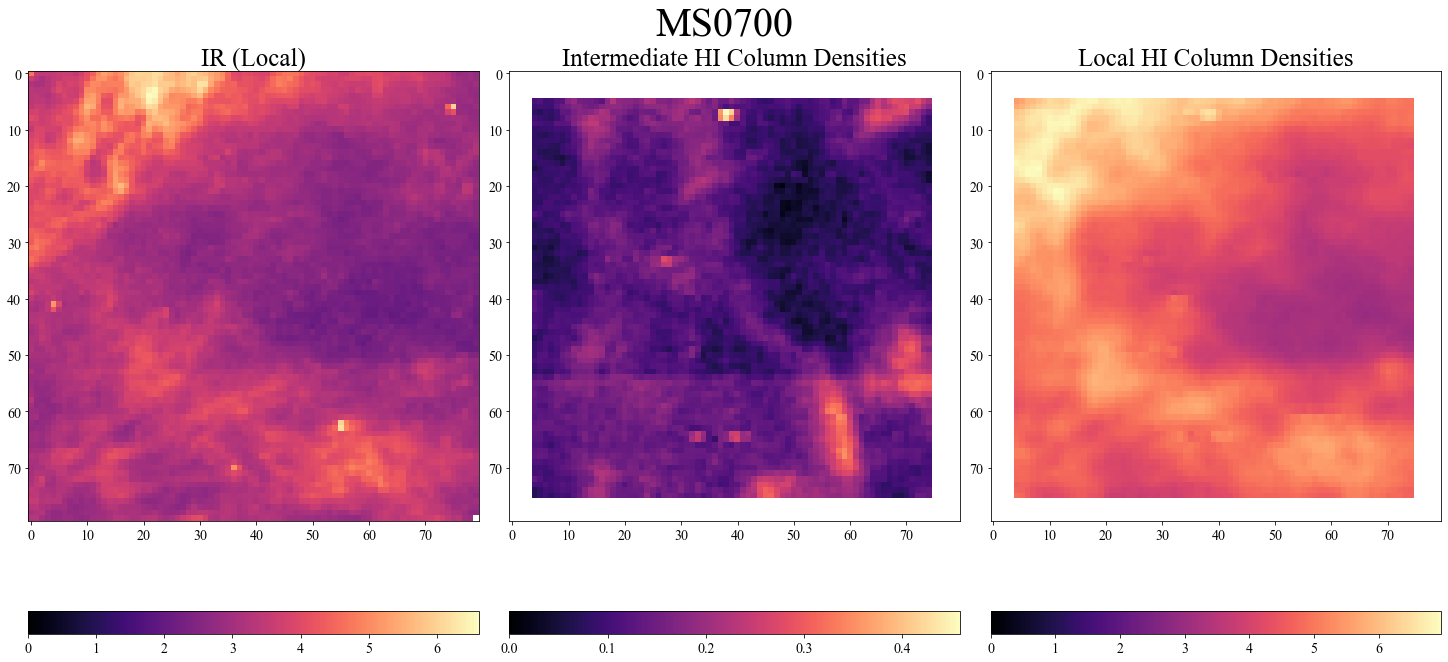

In [118]:
plot_file(file141, file142, file143, 'MS0700')

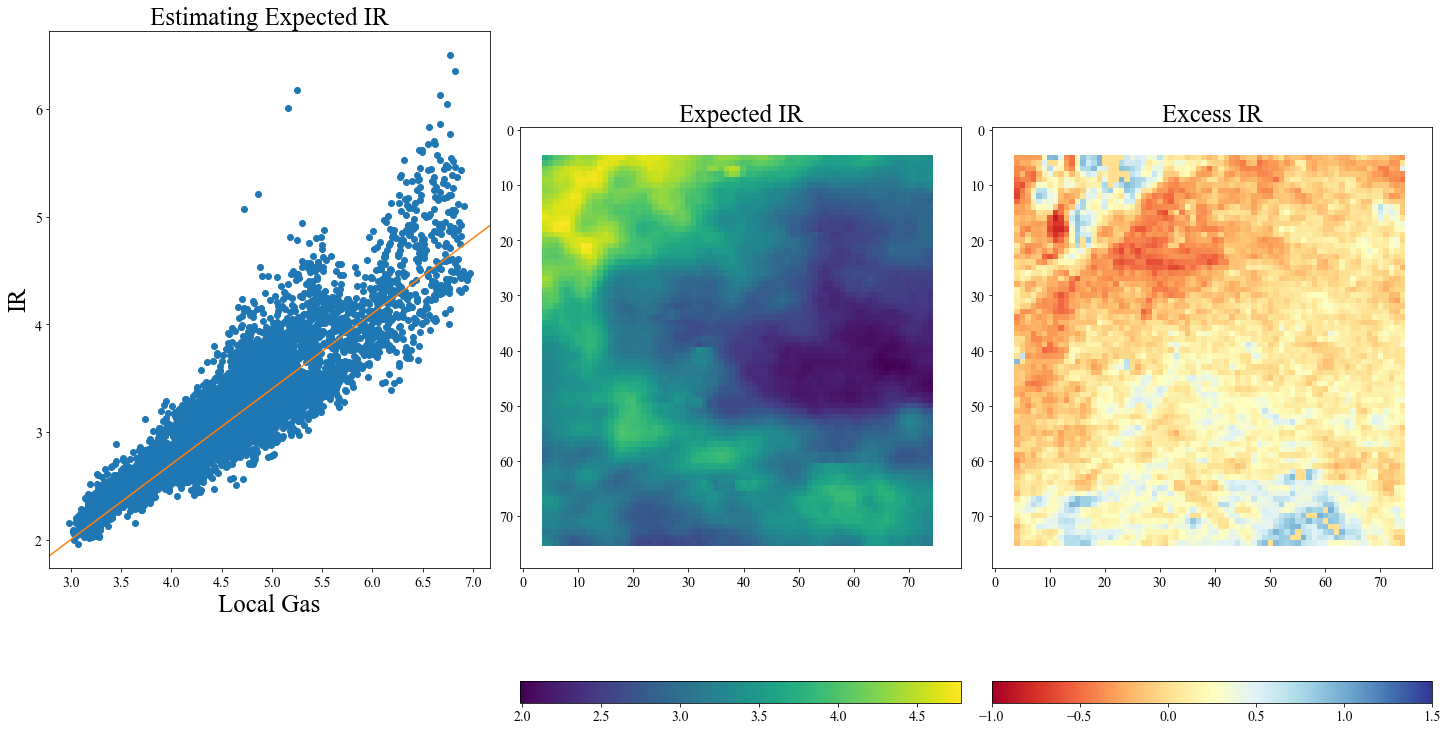

In [119]:
IR_exc14 = local_IR(file143, file142, 3, 2, 0.7, vmax = 1.5, vmin = -1, title = 'MS0700')

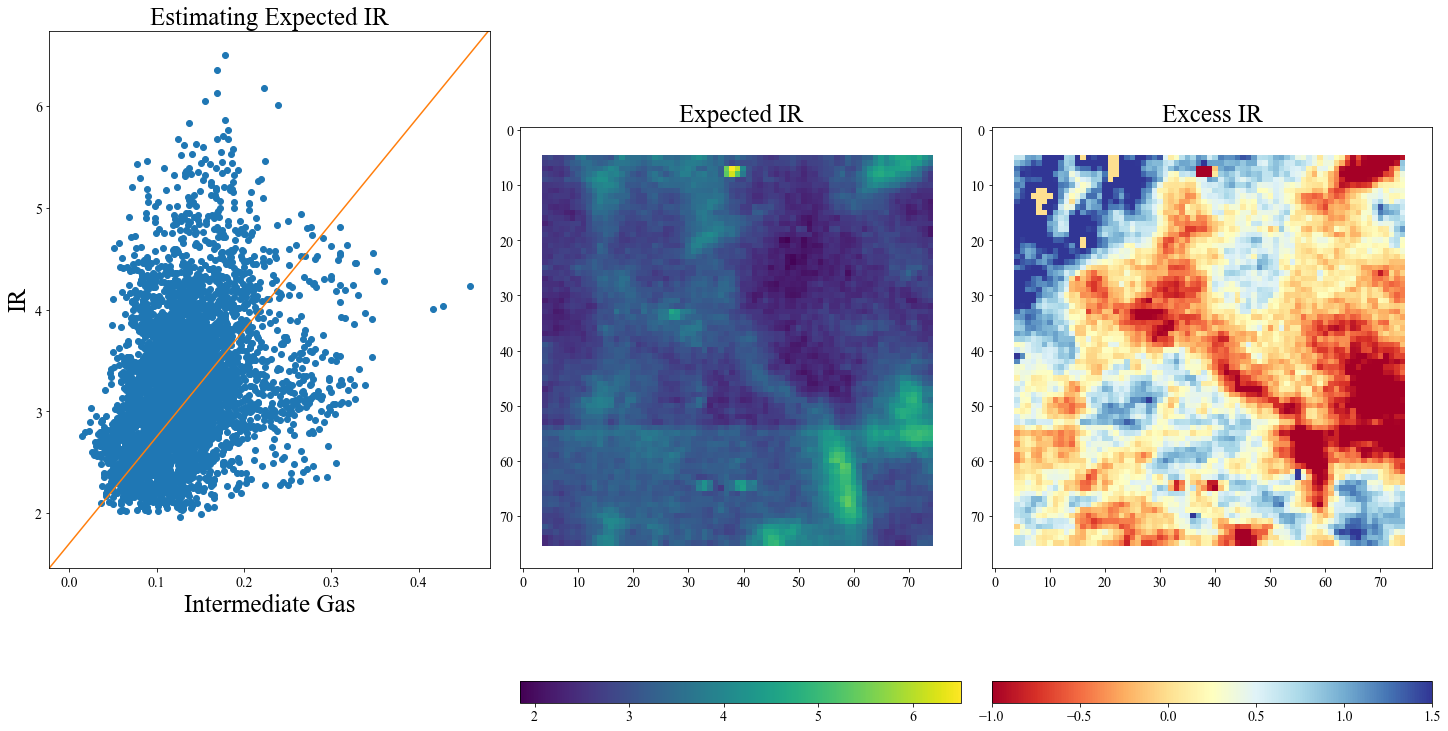

In [226]:
IR_exc444 = local_IR(file141, file142, 0, 1.7, 10.5, vmax = 1.5, vmin = -1, title = 'MS0700', inter = True)

(80, 80)


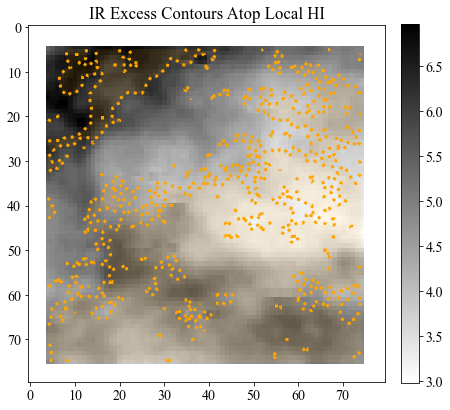

In [121]:
IR_overlay(file143, IR_exc14)

In [122]:
file151 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/H1821/_inter_HI.fits')
file152 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/H1821/_IR.fits')
file153 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/H1821/_local_HI.fits')

NO EXCESS IR (backed by Pierre's work)

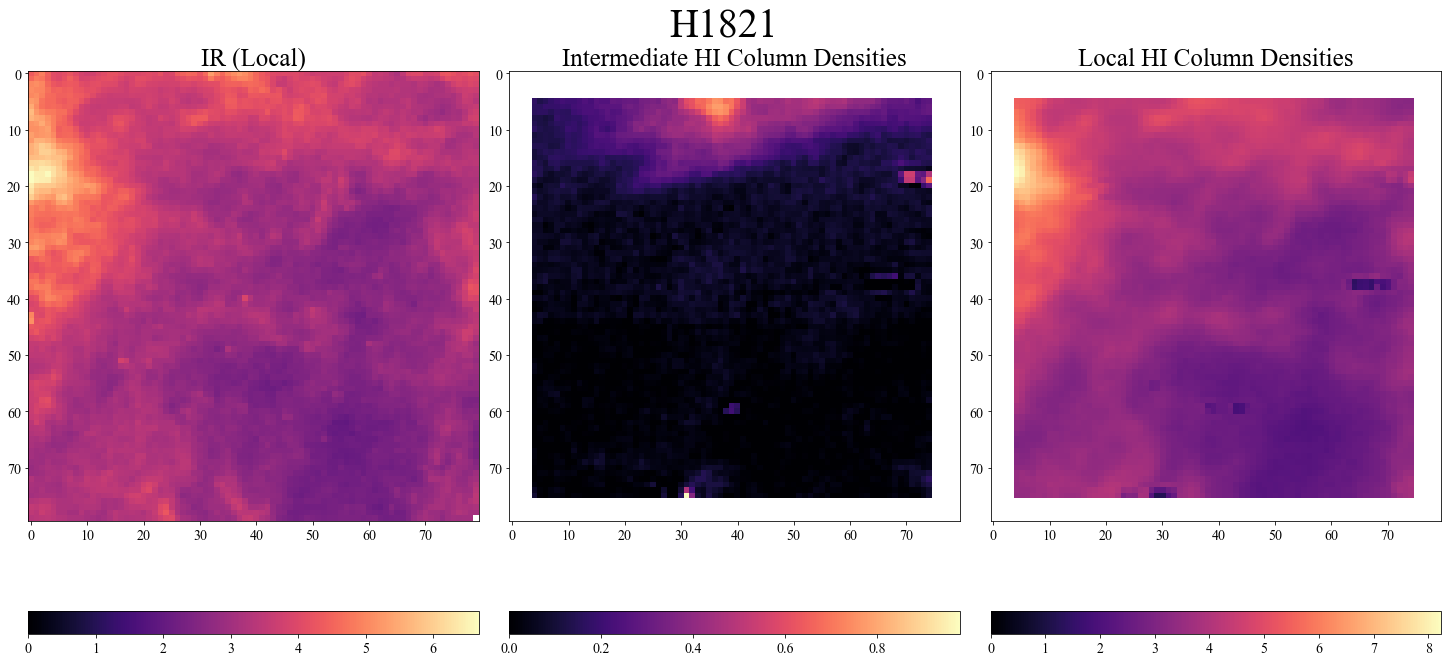

In [123]:
plot_file(file151, file152, file153, 'H1821')

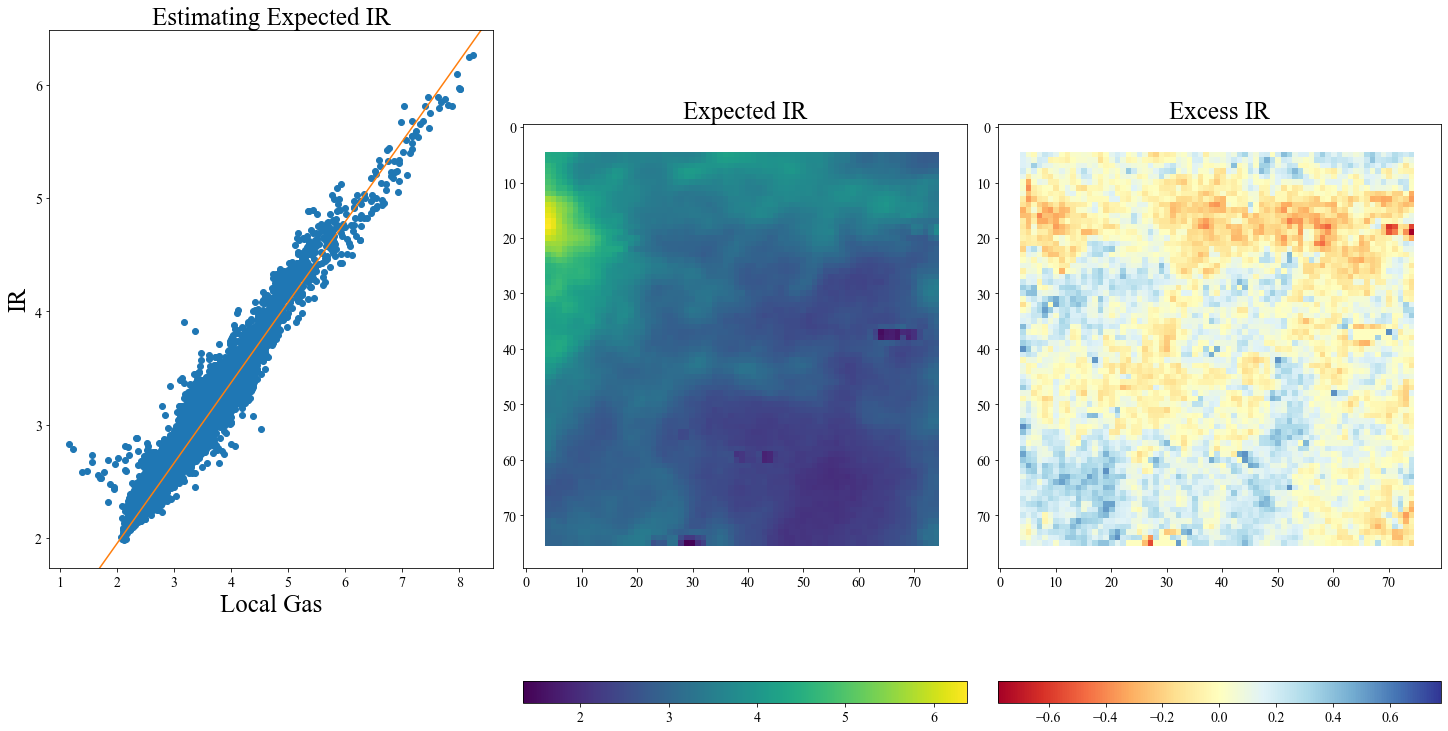

In [125]:
IR_exc15 = local_IR(file153, file152, 2, 1.95, 0.71, title = 'H1821')

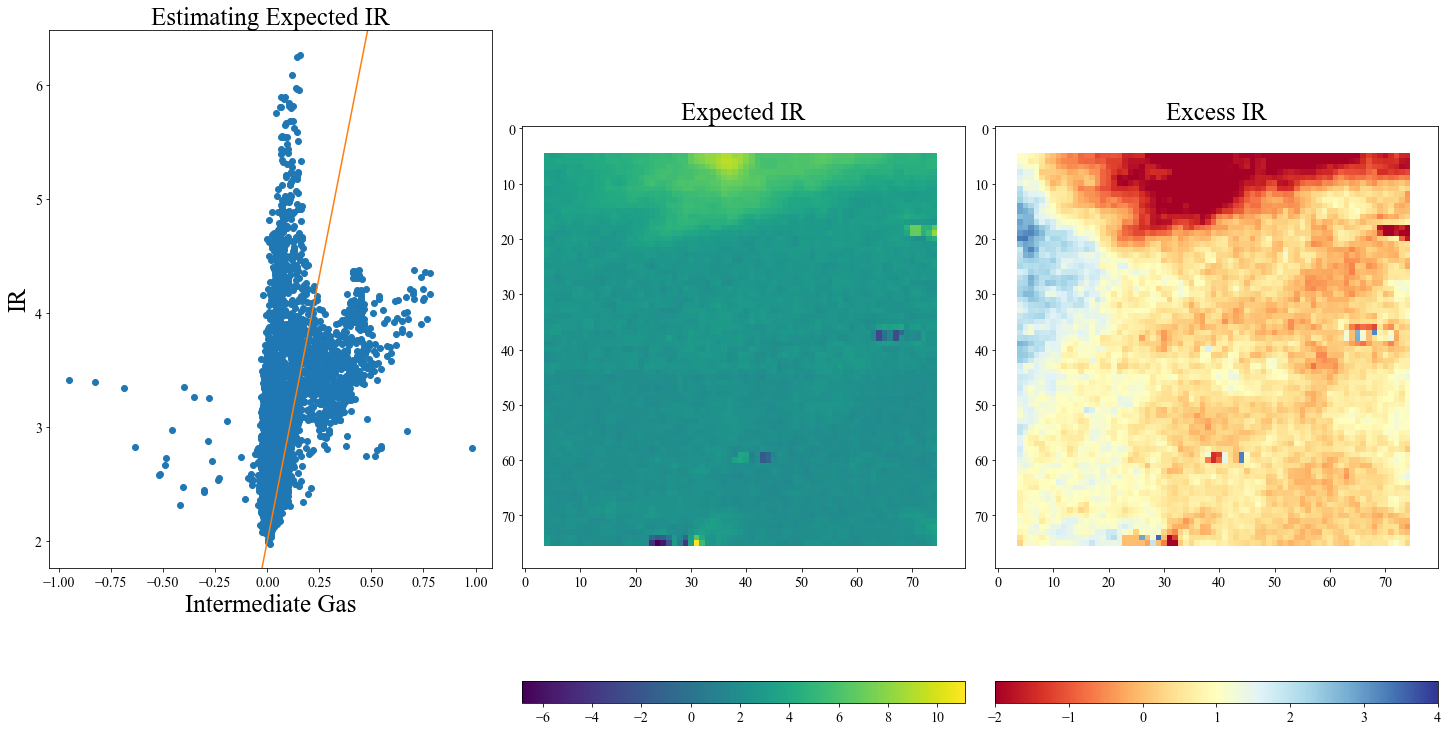

In [235]:
IR_exc555 = local_IR(file151, file152, 0, 2, 9.3, vmin = -2, vmax = 4, title = 'H1821', inter = True)

(80, 80)


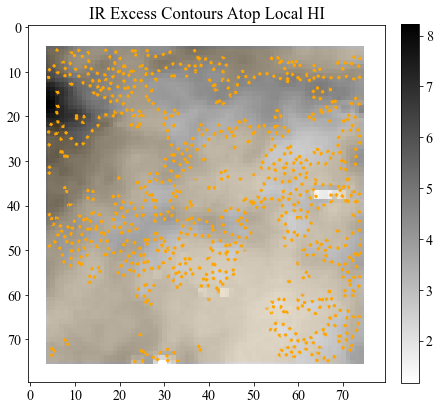

In [126]:
IR_overlay(file153, IR_exc15)

In [127]:
file161 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MKR205/_inter_HI.fits')
file162 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MKR205/_IR.fits')
file163 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/MKR205/_local_HI.fits')

NO EXCESS IR (backed by Pierre's work)

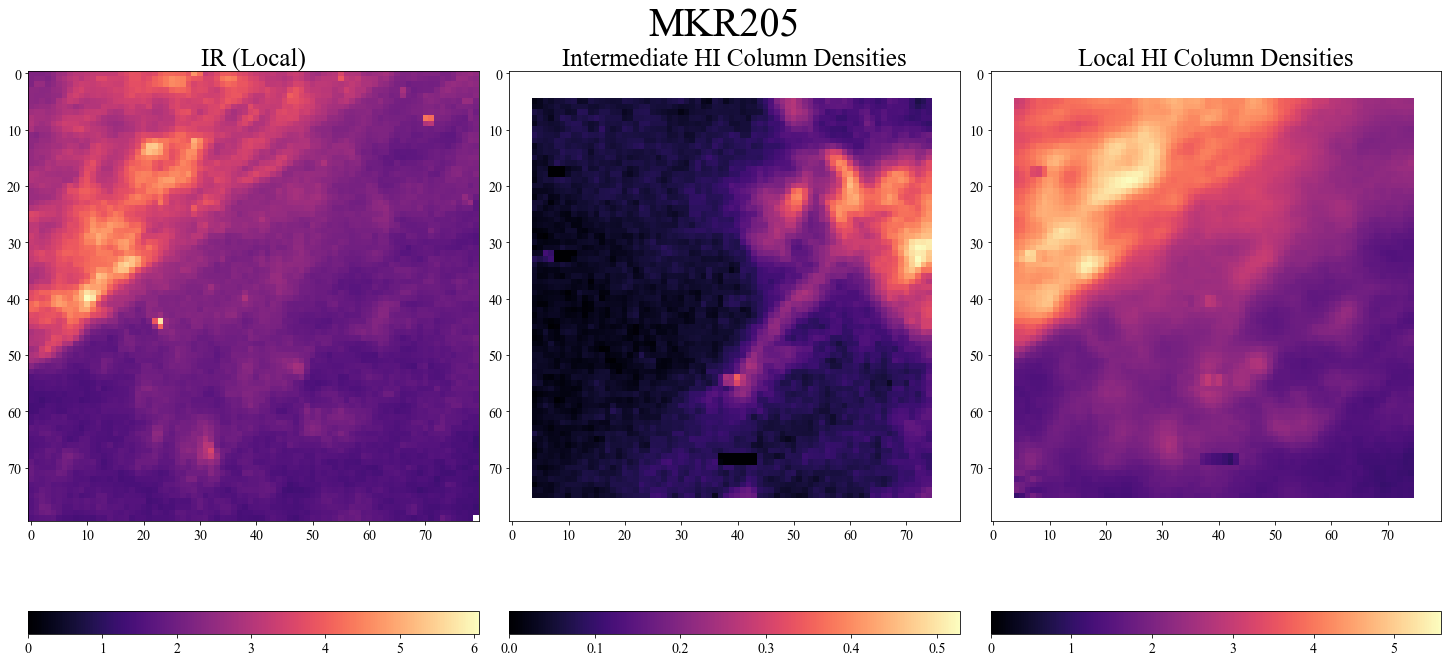

In [128]:
plot_file(file161, file162, file163, 'MKR205')

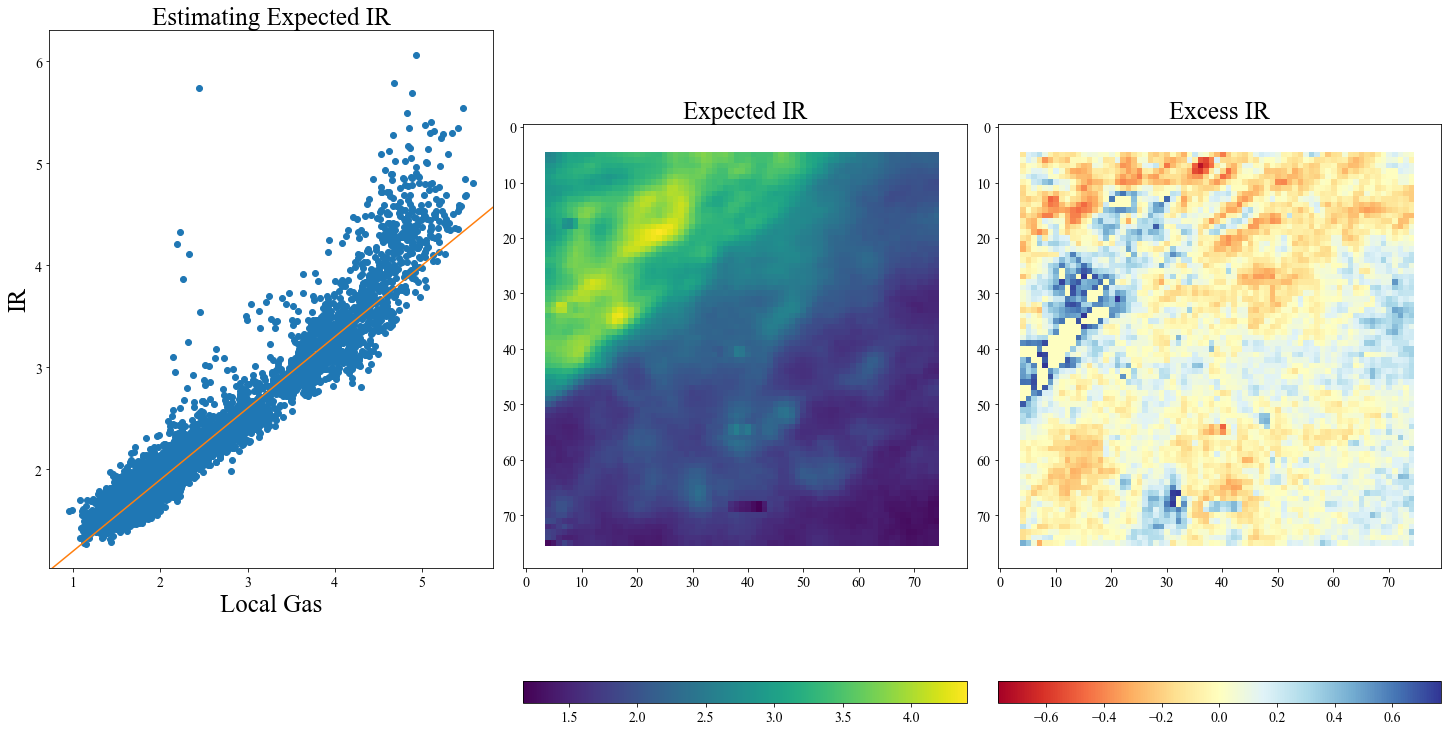

In [130]:
IR_exc16 = local_IR(file163, file162, 2, 1.9, 0.7, title = 'MKR205')

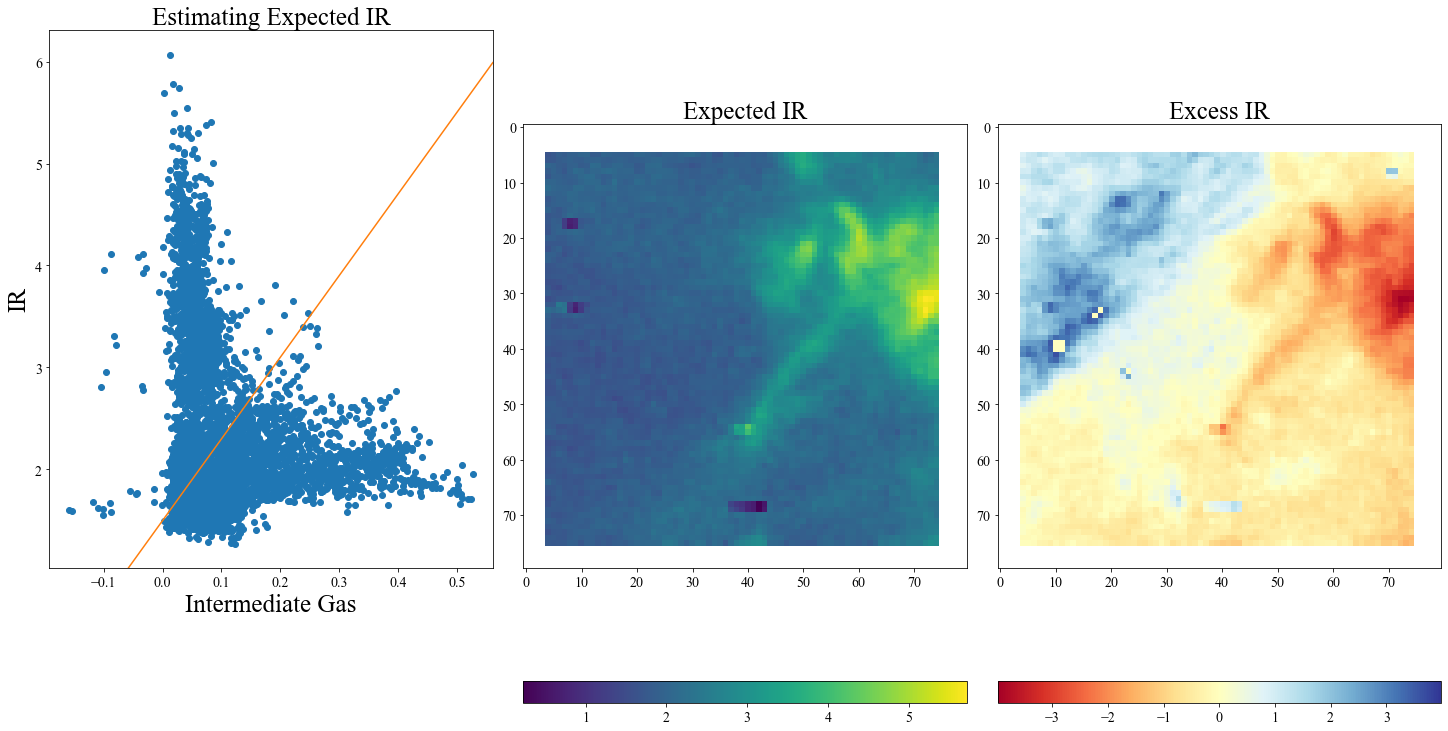

In [238]:
IR_exc66 = local_IR(file161, file162, 0, 1.5, 8, title = 'MKR205', inter = True)

(80, 80)


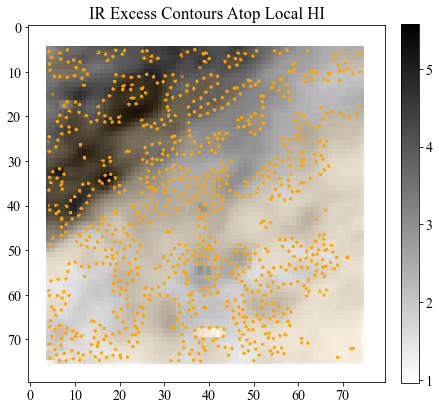

In [131]:
IR_overlay(file163, IR_exc16)

In [132]:
file171 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/N3310/_inter_HI.fits')
file172 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/N3310/_IR.fits')
file173 = fits.open('/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/Fortier_NHI/N3310/_local_HI.fits')

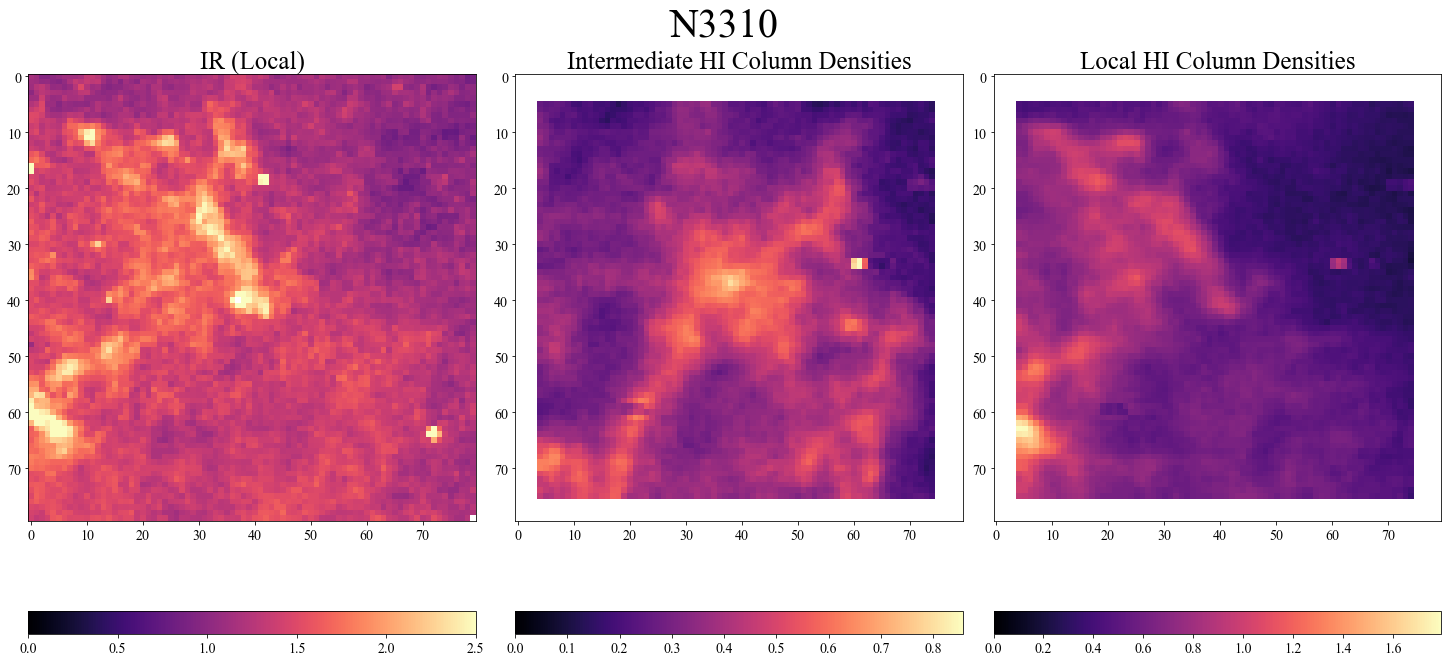

In [133]:
plot_file(file171, file172, file173, 'N3310', vmax1 = 2.5)

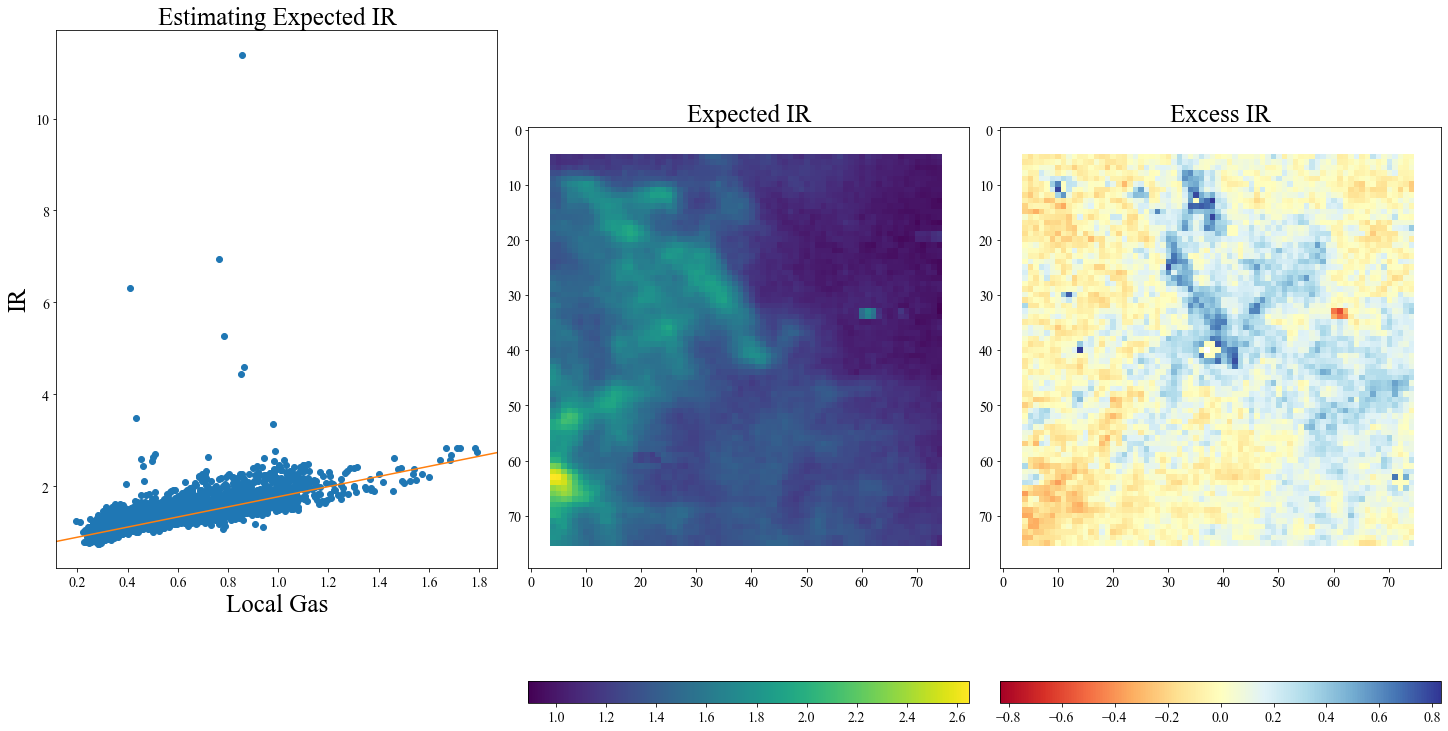

In [135]:
IR_exc17 = local_IR(file173, file172, 0.25, 0.95, 1.1, title = 'N3310')

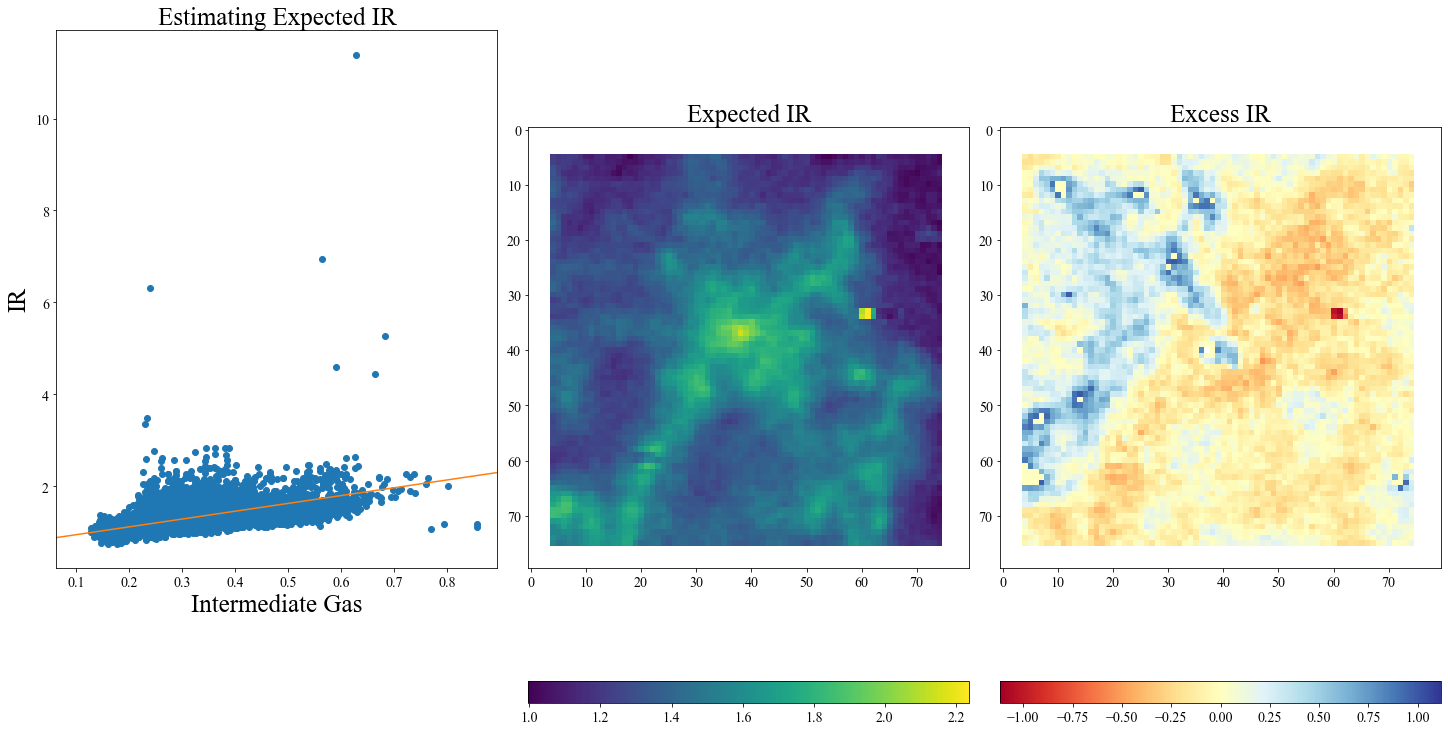

In [244]:
IR_exc77 = local_IR(file171, file172, 0.1, 0.95, 1.7, title = 'N3310', inter = True)

(80, 80)


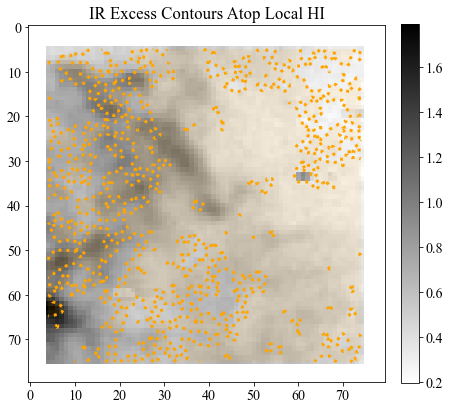

In [136]:
IR_overlay(file173, IR_exc17)

In [137]:
file21[0].header['CUNIT3'] = 'm/s     '
file23[0].header['CUNIT3'] = 'm/s     '
file31[0].header['CUNIT3'] = 'm/s     '
file33[0].header['CUNIT3'] = 'm/s     '
file41[0].header['CUNIT3'] = 'm/s     '
file43[0].header['CUNIT3'] = 'm/s     '
file51[0].header['CUNIT3'] = 'm/s     '
file53[0].header['CUNIT3'] = 'm/s     '
file61[0].header['CUNIT3'] = 'm/s     '
file63[0].header['CUNIT3'] = 'm/s     '
file71[0].header['CUNIT3'] = 'm/s     '
file73[0].header['CUNIT3'] = 'm/s     '
file81[0].header['CUNIT3'] = 'm/s     '
file83[0].header['CUNIT3'] = 'm/s     '
file91[0].header['CUNIT3'] = 'm/s     '
file93[0].header['CUNIT3'] = 'm/s     '
file101[0].header['CUNIT3'] = 'm/s     '
file103[0].header['CUNIT3'] = 'm/s     '
file111[0].header['CUNIT3'] = 'm/s     '
file113[0].header['CUNIT3'] = 'm/s     '
file121[0].header['CUNIT3'] = 'm/s     '
file123[0].header['CUNIT3'] = 'm/s     '
file131[0].header['CUNIT3'] = 'm/s     '
file133[0].header['CUNIT3'] = 'm/s     '
file141[0].header['CUNIT3'] = 'm/s     '
file143[0].header['CUNIT3'] = 'm/s     '
file151[0].header['CUNIT3'] = 'm/s     '
file153[0].header['CUNIT3'] = 'm/s     '
file161[0].header['CUNIT3'] = 'm/s     '
file163[0].header['CUNIT3'] = 'm/s     '
file171[0].header['CUNIT3'] = 'm/s     '
file173[0].header['CUNIT3'] = 'm/s     '

# DISCOVERING WHICH ABSORPTION LINE MEASUREMENTS ARE WITHIN THE DESIRED RANGE

Turns out none of the absorption line measurements are within the range LOL

In [370]:
file11[0].header

SIMPLE  =                    T / Written by IDL:  Mon Jan 14 10:31:29 2013      
BITPIX  =                  -64 / IEEE double precision floating point           
NAXIS   =                    2 /                                                
NAXIS1  =                   80 /Number of positions along axis 1                
NAXIS2  =                   80 /Number of positions along axis 2                
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   1.449400000000E-01                                                  
BMIN    =   1.449400000000E-01                                                  
BPA     =   0.000000000000E+00                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = '1H0717  '                                                            
                            

In [368]:
def abs_meas(hdr, y = FUSE1['GLON'], x = FUSE1['GLAT']):
    is_in = []
    y_range = [hdr['CRVAL1'] + (80 * (hdr['CDELT1'])), hdr['CRVAL1']] # GLON (GLS)
    x_range = [hdr['CRVAL2'], hdr['CRVAL2'] + (80 * hdr['CDELT2'])] # GLAT (GLS)
    for i in range(len(x)):
        if ((x[i] > x_range[1]) | (x[i] < x_range[0]) | (y[i] > y_range[1]) | (y[i] < y_range[0])):
            continue
        else:
            is_in.append([x[i], y[i]])
            
    return is_in

In [369]:
hdrs = [file11[0].header, file21[0].header, file31[0].header, file41[0].header, file51[0].header,
       file61[0].header, file71[0].header, file81[0].header, file91[0].header, file101[0].header, 
       file111[0].header, file121[0].header, file131[0].header, file141[0].header, file151[0].header,
       file161[0].header, file111[0].header]

for i in range(len(hdrs)):
    if (abs_meas(hdrs[i]) != []):
        print(abs_meas(hdrs[i]))